# Esame Data Science - a.a. 2018/2019

Di seguitono sono proposti gli esercizi per la prova d'esame.
Per presentarsi all'esame è necessario aver implementato una soluzione per tutti e 3 gli esercizi.

1. [Esercizio Decision Tree](#esercizio1)
2. [Esercizio regressione](#esercizio2)
3. [Esercizio clustering e classificazione con NN](#esercizio3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from tqdm import tqdm_notebook
import matplotlib.cm as cm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.layers import Dropout

Using TensorFlow backend.


<a id="esercizio1"></a>
## Esercizio Decision Tree

Per questo primo esercizio viene richiesto di creare un Decision Tree con le librerie python e di rappresentarne il risultato per farci dei ragionamenti.

I dati da utilizzare sono contenuti nel dataset `data/student-mat.csv`, che contiene dei dati sulle abitudini di consumo di alcool di studenti portoghesi. Il dataset contiene diverse colonne descritte nella lista qui sotto:
- school - la scuola a cui è iscritto lo studente (binario: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira)
- sex - il genere dello studente (binario: 'F' - femmina o 'M' - maschi)
- age - l'età dello studente (numerico: da 15 a 22)
- address - il tipo di indirizzo della casa in cui abitta lo studente (binario: 'U' - urbano o 'R' - rurale)
- famsize - la dimensione della famiglia (binario: 'LE3' - minore o uguale a 3 componenti o 'GT3' - maggiore di 3 componenti)
- Pstatus - lo stato di coabitazione dello studente (binario: 'T' - che vive insieme ad altri o 'A' - che vive isolato)
- Medu - l'educazione della madre (numerico: 0 - nessuna, 1 - educazione primaria, 2 – media, 3 – superiori 4 – università o educazione superiore)
- Fedu - l'educazione del padre (numerico: 0 - nessuna, 1 - educazione primaria, 2 – media, 3 – superiori 4 – università o educazione superiore
- Mjob - il lavoro della madre (nominale: 'teacher' - insegnante, 'health' - lavori in ambito sanitario, 'services' - pubblica amministrazione, 'at_home' - casalinga o 'other' - altro)
- Fjob - il lavoro del padre (nominale: 'teacher' - insegnante, 'health' - lavori in ambito sanitario, 'services' - pubblica amministrazione, 'at_home' - casalingo o 'other' - altro)
- reason - motivo di scelta per la scuola (nominale: 'home' - vicino a casa, 'reputation' - reputazione della scuola, 'course' - preferenza per il corso o 'other' - altro)
- guardian - guardiano dello studente (nominale: 'mother' - madre, 'father' - padre o 'other' - altro)
- traveltime - tempo di trasferimento da casa a scuola (numerico: 1 - <15 min., 2 - da 15 a 30 min., 3 - da 30 min. a 1 ora, o 4 - >1 ora)
- studytime - tempo settimanale di studio (numerico: 1 - <2 ore, 2 - da 2 a 5 ore, 3 - da 5 a 10 ore, o 4 - >10 ore)
- failures - numero dei passati fallimenti in classe (numerico: n se 1<=n<3, altrimenti 4)
- schoolsup - ripetizioni (binario: yes o no)
- famsup - supporto educativo da parte della famiglia (binario: yes o no)
- paid - classi pagate aggiuntive sul corso (matematica) (binario: yes o no)
- activities - attività extra-curricularari (binario: yes o no)
- nursery - ha frequentato l'asilo nido (binario: yes o no)
- higher - vuole frequentare l'università (binario: yes o no)
- internet - ha accesso a internat da casa (binario: yes o no)
- romantic - è in una relazione sentimentale (binario: yes o no)
- famrel - qualità delle relazioni famigliari (numerico: da 1 - molto cattive a 5 - eccellenti)
- freetime - tempo libero dopo scuola (numerico: da 1 - molto poco a 5 - molto)
- goout - esce con gli amici (numerico: da 1 - molto poco a 5 - molto spesso)
- Dalc - consumo di alcool in giorni infrasettimanali (numerico: da 1 - molto poco a 5 - molto)
- Walc - consumo di alcool durante i weekend (numerico: da 1 - molto poco a 5 - molto)
- health - stato attuale di salute (numerico: da 1 - pessimo a 5 - ottimo)
- absences - numero di assenze da scuola (numerico: da 0 a 93)

Questi voti, quindi, rappresentano il rendimento scolastico. In particolare questi voti sono relativi al corso di matematica:
- G1 - voto del primo semestre (numerico: da 0 a 20)
- G2 - voto del secondo semestre (numerica: da 0 a 20)
- G3 - voto finale (numerico: da 0 a 20)

Per l'esercizio è richiesto di creare un albero di decisione che descriva quali variabili influiscono maggiormente sul consumo alcolico nei ragazzi.

L'albero può essere troncato ad una profondità di qualche livello e deve essere allegato e discusso con alcune considerazioni sul dataset.

Dopo la realizzazione dell'albero, viene richiesto di disegnarlo e caricare l'immagine nel notebook (è possibile utilizzare il sito internet visto a lezione (http://webgraphviz.com).
I risultati ottenuti nell'albero devono essere quindi brevemente commentati.

Carico il dataset attraverso la libreria pandas con il metodo <code>read_csv</code>

In [611]:
data = pd.read_csv("data/student-mat.csv")

In [612]:
print("Dimensioni dataframe: {}".format(data.shape))
data.head()

Dimensioni dataframe: (395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Provo a ripulire il dataset da valori mancanti, controllo alla fine le dimensioni per verificare se ho perso dei dati o meno

In [613]:
data_clean = data.dropna()
print("Dimensioni dataframe senza nan: {}".format(data.shape))
data_clean.head()

Dimensioni dataframe senza nan: (395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Le dimensioni sono uguali a quelle iniziali, nel dataset non erano preseti valori mancanti

Vedo che nel dataset ci sono due attributi che si riferiscono al consumo alcolico: il consumo settimanale e quello nei weekend. Decido di utilizzarli entrambi creando una nuova variabile pesando i primi due attributi sul numero di giorni a cui si riferiscono.
<body>
    L'obiettivo è capire quali sono le variabili che influenzano il consumo di alcohol nei giovani. 

In [614]:
Walc = data_clean.loc[:,"Walc"]
Dalc = data_clean.loc[:,"Dalc"]

Alc = round(Walc*2/7 + Dalc*5/7)

A questo punto non ho più bisogno delle due variabili iniziali e quindi le droppo dal dataset.

In [615]:
data_clean["Alc"] = Alc
data = data_clean.drop(["Dalc","Walc"], axis = 1)


Provo a plottare la matrice di correlazione per vedere se ci sono delle correlazioni particolari.

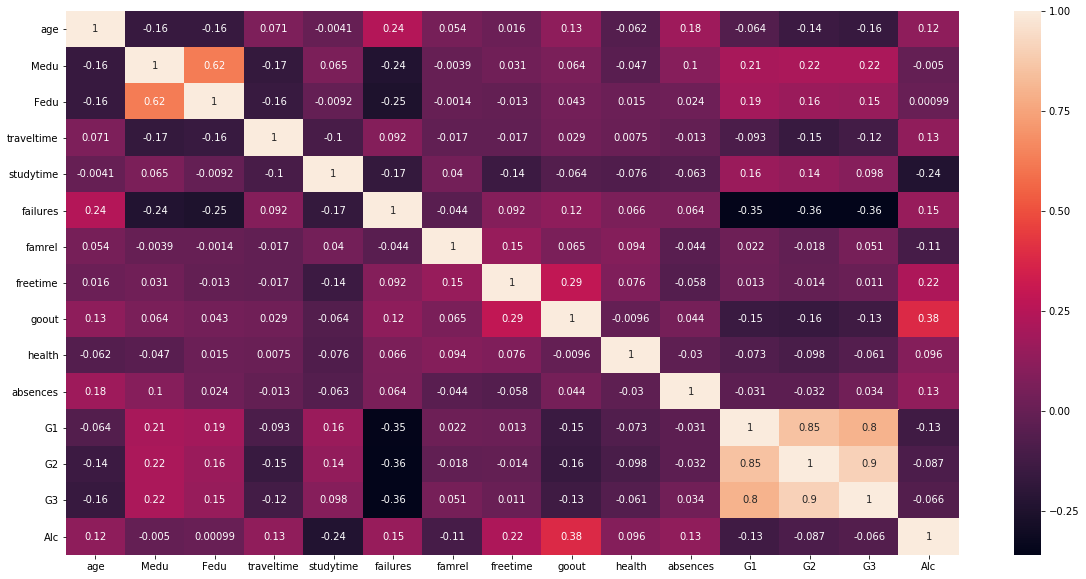

In [649]:
fig = plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot = True)

In [616]:
data.head()

dataset = data.copy()

<body>
Creo un array di target dove sono presenti i valori della nuova variabile Alc
    </body>
    

In [617]:
target = dataset.loc[:,"Alc"]
X_new = dataset.drop(["Alc"],axis = 1)
X = X_new.copy()

<body>
    Come si può notare diversi attributi sono delle stringhe, rimappo tutti questi attributi in interi
    </body>

In [618]:
X.school = X.school.map({"GP":0, "MS":1})
X.sex = X.sex.map({"F":0, "M":1})
X.address = X.address.map({"U":0,"R":1})
X.famsize = X.famsize.map({"GT3":0, "LE3":1})
X.Pstatus = X.Pstatus.map({"T":0,"A":1})
X.Mjob = X.Mjob.map({"teacher":0,"health":1,"services":2,"at_home":3,"other":4})
X.Fjob = X.Fjob.map({"teacher":0,"health":1,"services":2,"at_home":3,"other":4})
X.reason = X.reason.map({"home":0,"reputation":1,"course":2,"other":3})
X.guardian = X.guardian.map({"mother":0,"father":1,"other":2})
X.schoolsup = X.schoolsup.map({"yes":0,"no":1})
X.famsup = X.famsup.map({"yes":0,"no":1})
X.paid = X.paid.map({"yes":0,"no":1})
X.activities = X.activities.map({"yes":0,"no":1})
X.nursery = X.nursery.map({"yes":0,"no":1})
X.higher = X.higher.map({"yes":0,"no":1})
X.internet = X.internet.map({"yes":0,"no":1})
X.romantic = X.romantic.map({"yes":0,"no":1})


Inizio a creare il primo albero decisionale. Per ogni albero divido il dataset in train e in test in modo da poter validare il modello dopo l'allenamento

In [627]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)

In [637]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier(max_depth=4)
dct.fit(X_train, y_train)
score = dct.score(X_test, y_test)
print("High-Dimensionality Score:", round(score,2))


High-Dimensionality Score: 0.54


In [638]:
tree.export_graphviz(dct,
                     out_file='DT0.dot',
                     impurity=False,
                     feature_names=X_test.columns.values,
                     rounded=True,
                     filled=True)



In [640]:
from IPython.display import Image

In [642]:
!dot -Tpng DT0.dot -o DT0.png

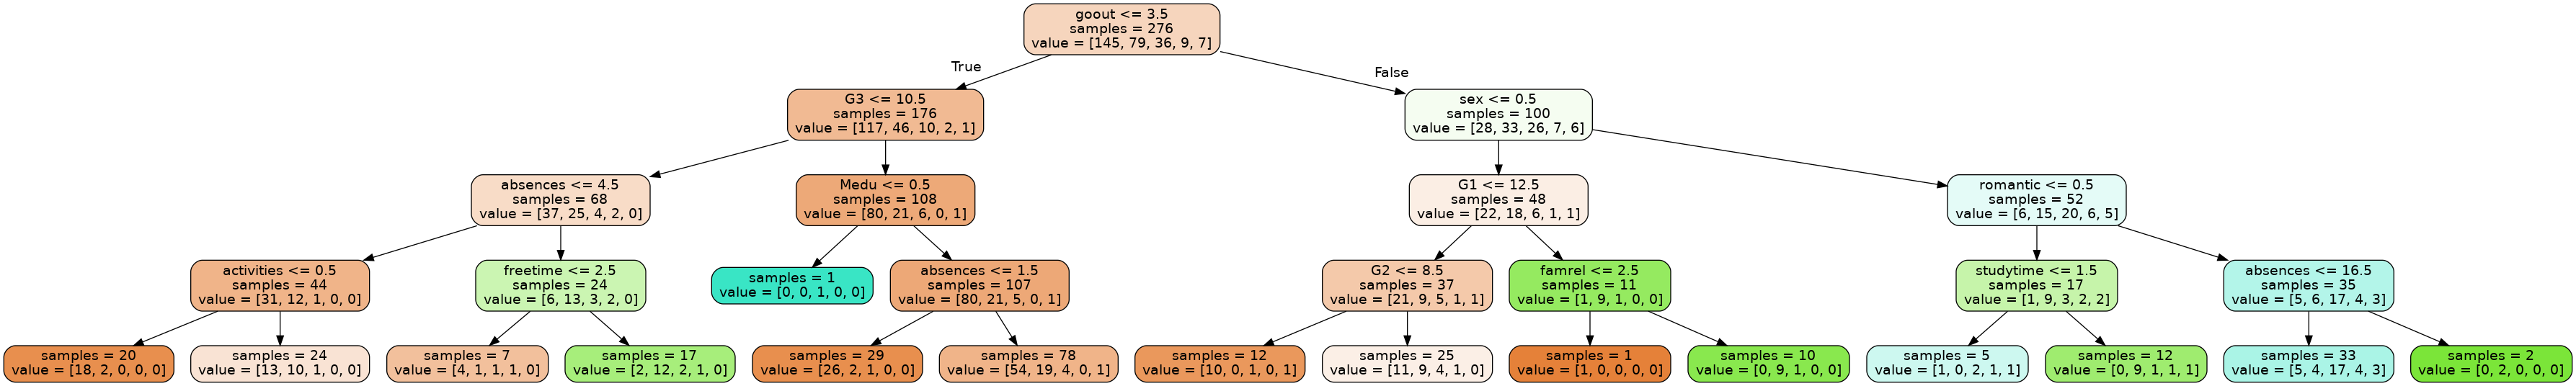

In [643]:
Image(filename="DT0.png")

Chiaramente il tree appena prodotto è molto grande e si fa fatica a capire le variabili che contribuiscono maggiormente al consumo di alcohol. Cerco di ridurre il tree creandone diversi più piccoli

Vedo prima di tutto se otteniamo qualche informazione dal sesso e dall'età degli studenti.

In [446]:
x = X.loc[:,["age","sex"]]

X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.3, random_state=42)


dct = DecisionTreeClassifier(max_depth = 2)
dct.fit(X_train, y_train)

y_pred = dct.predict(X_test)

score = dct.score(X_test, y_test)
print("High-Dimensionality Score:", round(score,2))

High-Dimensionality Score: 0.59


In [447]:
tree.export_graphviz(dct,
                     out_file='DT1.dot',
                     impurity=False,
                     feature_names=X_test.columns.values,
                     rounded=True,
                     filled=True)

In [448]:
!dot -Tpng DT1.dot -o DT1.png

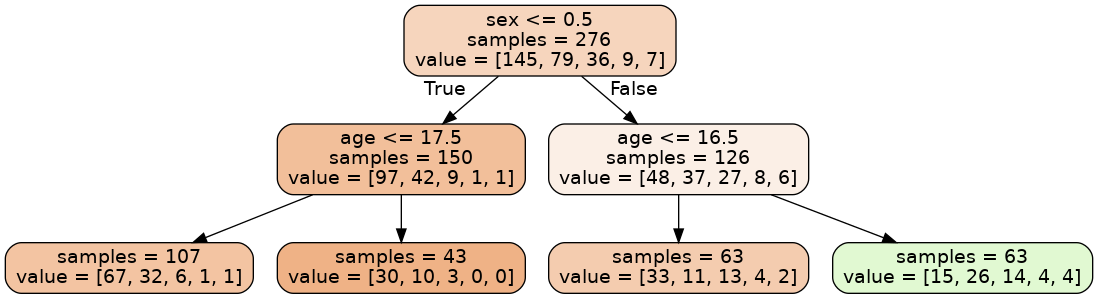

In [449]:
Image(filename="DT1.png")

Come si osserva abbiamo una prima suddivisione utilizzando la variabile sesso. Partiamo da avere 12 persone che bevono spesso ( >3) e il 75% di queste è maschio. Notiamo quindi la prima differenza importante. Inoltre continuando a leggere il lato destro dell'albero abbiamo che le 9 persone trovate precedentemente hanno tutti >15.5 anni (57%).
Concludendo possiamo dire che le persone che bevono di più sono i ragazzi con un'età maggiore di 16 anni!

Controllo se la scuola frequentata è un attributo importante per quanto riguarda il consumo alcolico.

In [450]:
x = X.loc[:,["school"]]

X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.3)

dct = DecisionTreeClassifier(max_depth = 2)
dct.fit(X_train, y_train)

score = dct.score(X_test, y_test)
print("High-Dimensionality Score:", round(score,2))

tree.export_graphviz(dct,
                     out_file='DT2.dot',
                     impurity=False,
                     feature_names=X_test.columns.values,
                     rounded=True,
                     filled=True)

High-Dimensionality Score: 0.51


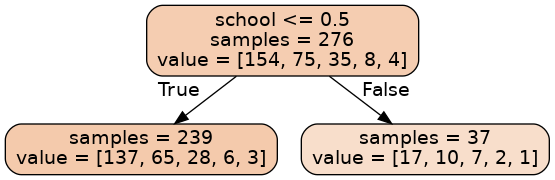

In [451]:
!dot -Tpng DT2.dot -o DT2.png
Image(filename="DT2.png")

Come si osserva dal tree la statistica tra le due scuole è estremamente diversa. Abbiamo 244 samples per GP e solo 32 per MS. Quello che si può osservare è che i ragazzi che bevono tanto (>3) fanno parte della scuola GP (86%). Complessivamente si osserva che GP ospita studenti che bevono di più.

Un fattore che potrebbe influire sul consumo di alcolici è sicuramente l'educazione e lo stato sociale familiare. Creo un tree che tiene conto di queste variabili.

In [452]:
X.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [453]:
x = X.loc[:,["famrel", "famsup"]]

X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.3, random_state = 42)

dct = DecisionTreeClassifier(max_depth = 3)
dct.fit(X_train, y_train)

score = dct.score(X_test, y_test)
print("High-Dimensionality Score:", round(score,2))

tree.export_graphviz(dct,
                     out_file='DT3.dot',
                     impurity=True,
                     feature_names=X_test.columns.values,
                     rounded=True,
                     filled=True)


High-Dimensionality Score: 0.59


In [454]:
!dot -Tpng DT3.dot -o DT3.png

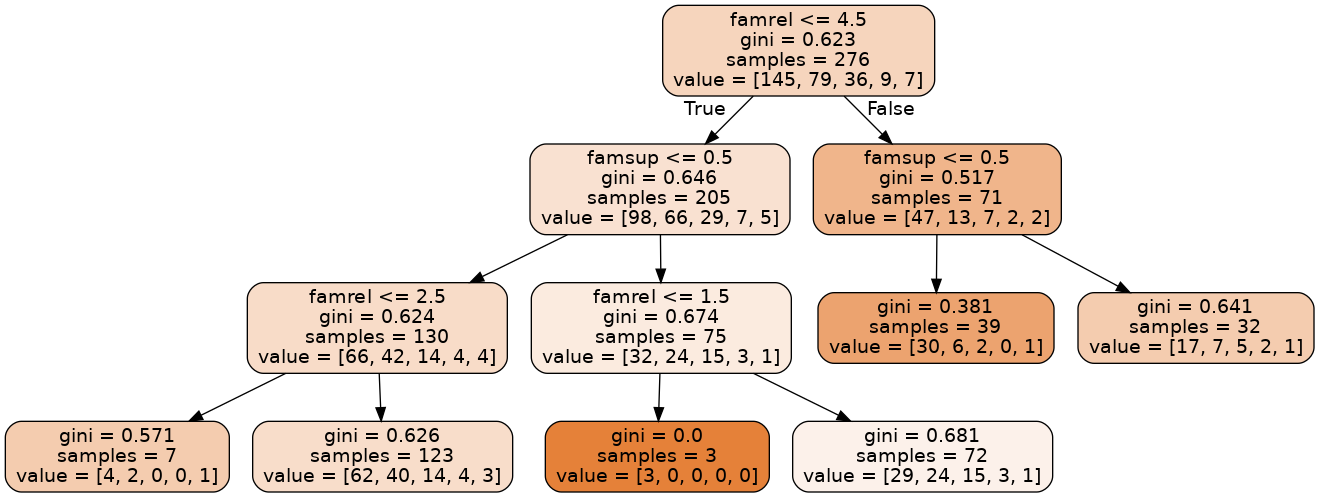

In [455]:
Image(filename="DT3.png")

Come possiamo vedere dal tree abbiamo la prima variabile <b>famrel</b> che è quella che splitta meglio il dataset.
Osserviamo che gli studenti che bevono di più hanno una relazione famigliare < 5. Tuttavia essendo che questa variabile va da 0 a 5 e la soglia è stata messa a 5 è chiaro che la statistica sia più alta in quelli che hanno una relazione famigliare < 5. Per avere più informazioni ci conviene quindi andare avanti a leggere il tree.
La seconda variabile decisionale è <b>famsup</b>. Leggendo il lato sinistro dell'albero osserviamo che i ragazzi che hanno avuto supporto dalla famiglia sono quelli che bevono di più. Sembra un risultato strano in quanto mi sarei aspettato che uno studente che è stato seguito dalla famiglia bevesse di meno. Tuttavia si può pensare che il supporto educativo sia entrato in atto proprio a causa dell'elevato consumo alcolico. Continuando sul lato sinistro (dove è presente la statistica più alta di studenti che bevono più spesso), abbiamo un'ulteriore classificazione in base alla relazione famigliare. Qui osserviamo che gli studenti che bevono di più (>2) sono quelli che hanno una relazione famigliare buona. Anche questo lo ritengo un risultato inaspettato, continuo quindi con l'indagine per capire se ci sono altre variabili che influiscono maggiormente su questo problema.

Quello che potrebbe influire è lo stile di vita dello studente. Inizio ad indagare sulle variabili <b>address</b> e <b>Pstatus</b>, ovvero il luogo in cui vive e se è isolato o meno.

In [456]:
x = X.loc[:,["address", "Pstatus"]]

X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.3, random_state = 42)

dct = DecisionTreeClassifier(max_depth = 3)
dct.fit(X_train, y_train)

score = dct.score(X_test, y_test)
print("High-Dimensionality Score:", round(score,2))

tree.export_graphviz(dct,
                     out_file='DT4.dot',
                     impurity=True,
                     feature_names=X_test.columns.values,
                     rounded=True,
                     filled=True)


High-Dimensionality Score: 0.59


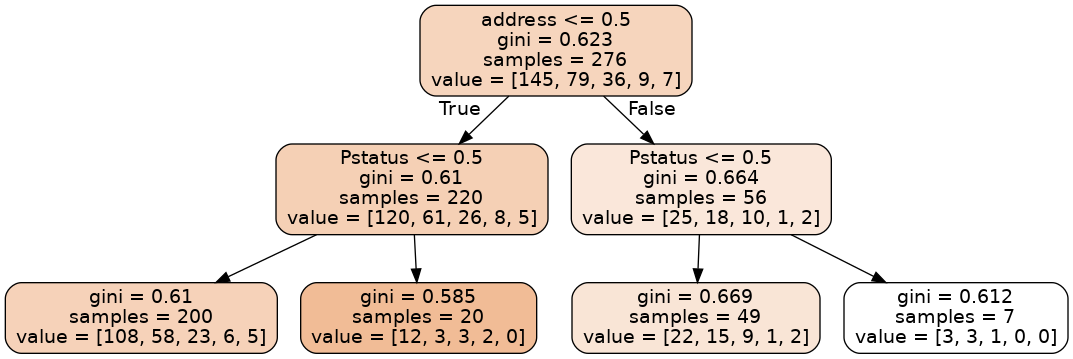

In [457]:
!dot -Tpng DT4.dot -o DT4.png
Image(filename="DT4.png")

La prima suddivisione è rispetto al tipo di luogo in cui lo studente vive. Abbiamo alta statistica sulla zona urbana piuttosto che quella rurale e gli studenti che bevono di più rientrano nella zona urbana. Continuando quindi sul lato sinistro dell'albero osserviamo che gli studenti che vivono insieme ad altre persone sono quelle che bevono di più. Questo lo si osserva anche studiando il lato destro dell'albero. Possiamo quindi concludere che il fatto di vivere con altre persone porta i ragazzi a consumare più alcol.

Un'altra classe che mi aspetto contribuisca è il tempo extrascolastico. Considero le variabili che descrivono questa caratteristica.

In [458]:

x = X.loc[:,["activities","romantic","freetime","goout"]]

X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.2, random_state = 42)

dct = DecisionTreeClassifier(max_depth = 3)
dct.fit(X_train, y_train)

score = dct.score(X_test, y_test)
print("High-Dimensionality Score:", round(score,2))

tree.export_graphviz(dct,
                     out_file='DT5.dot',
                     impurity=True,
                     feature_names=X_test.columns.values,
                     rounded=True,
                     filled=True)


High-Dimensionality Score: 0.56


In [459]:
!dot -Tpng DT5.dot -o DT5_2.png


 <img src="DT5_2.png" alt="Girl in a jacket" style="width:1500px;height:500px;"> 

La prima variabile utilizzata dal modello per classificare è <b>goout</b>, ovvero il tempo in cui lo studente esce con gli amici. Questa ci da un'informazione abbastanza rilevante: gli studenti che bevono di più sono quelli che escono molto spesso con gli amici (>4). Continuando quindi sul lato destro del'albero osserviamo che la seconda variabile sfruttata è <b>romantic</b>, ovvero se lo studente è impegnato in una relazione sentimentale o meno. Questa variabile porta ad una suddivisione uguale rispetto ai ragazzi che bevono di più e quindi non ci da nessuna informazione rilevante. Successivamente il modello sfrutta nuovamente la variabile <b>goout</b> e osserviamo che i ragazzi che escono spesso con gli amici sono quelli che bevono di più. L'albero utilizza anche le variabili <b>freetime</b> e <b>activities</b>, ma queste non portano ad informazioni rilevanti. Sicuramente possiamo concludere che gli studenti che escono spesso con gli amici sono quelli che bevono di più.

Oltre al rapport con la famiglia ritengo che le variabili che possano influenzare possano essere quelle relative al livello educativo.


In [460]:
x = X.loc[:,["Medu","Fedu","nursery"]]

X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.2, random_state = 42)

dct = DecisionTreeClassifier(max_depth = 3)
dct.fit(X_train, y_train)

score = dct.score(X_test, y_test)
print("High-Dimensionality Score:", round(score,2))

tree.export_graphviz(dct,
                     out_file='DT6.dot',
                     impurity=True,
                     feature_names=X_test.columns.values,
                     rounded=True,
                     filled=True)


High-Dimensionality Score: 0.65


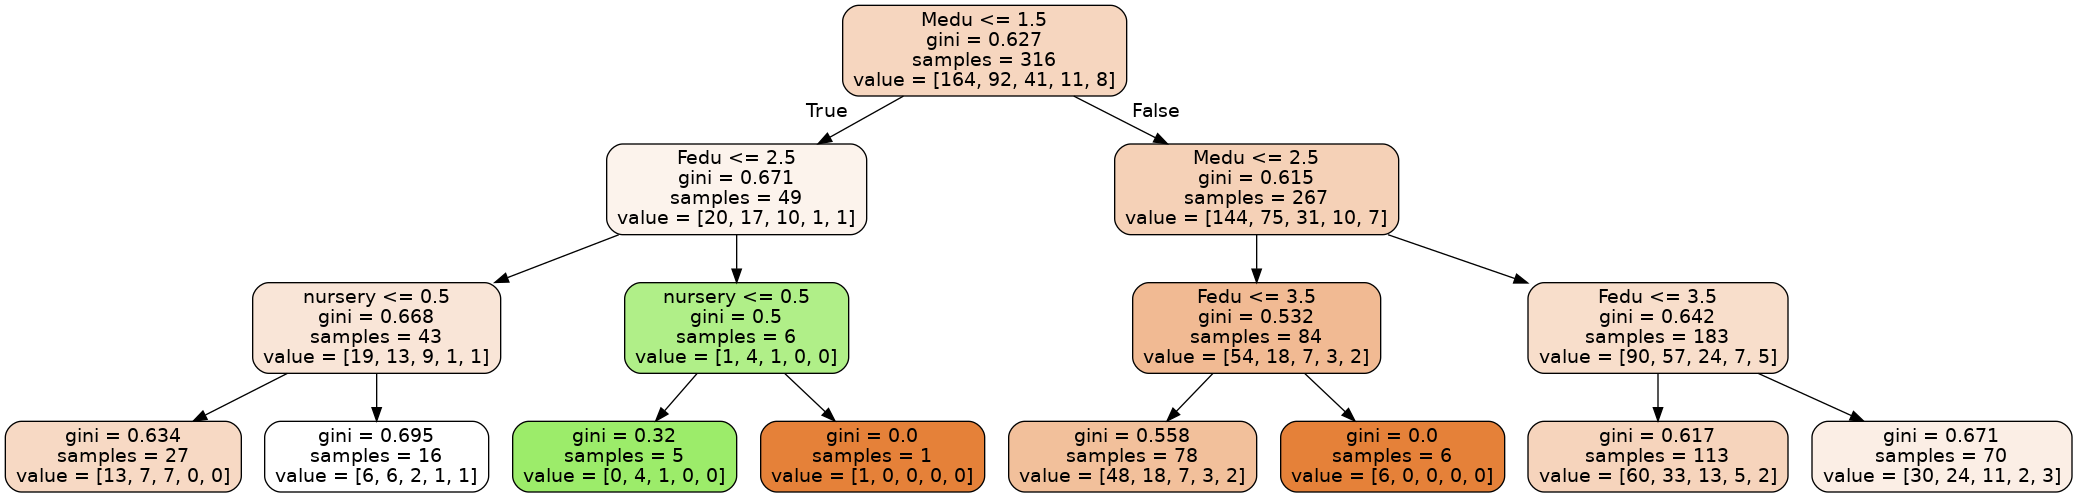

In [461]:
!dot -Tpng DT6.dot -o DT6.png
Image(filename="DT6.png")

In [ ]:
X.school = X.school.map({"GP":0, "MS":1})
X.sex = X.sex.map({"F":0, "M":1})
X.address = X.address.map({"U":0,"R":1})
X.famsize = X.famsize.map({"GT3":0, "LE3":1})
X.Pstatus = X.Pstatus.map({"T":0,"A":1})
X.Mjob = X.Mjob.map({"teacher":0,"health":1,"services":2,"at_home":3,"other":4})
X.Fjob = X.Fjob.map({"teacher":0,"health":1,"services":2,"at_home":3,"other":4})
X.reason = X.reason.map({"home":0,"reputation":1,"course":2,"other":3})
X.guardian = X.guardian.map({"mother":0,"father":1,"other":2})
X.schoolsup = X.schoolsup.map({"yes":0,"no":1})
X.famsup = X.famsup.map({"yes":0,"no":1})
X.paid = X.paid.map({"yes":0,"no":1})
X.activities = X.activities.map({"yes":0,"no":1})
X.nursery = X.nursery.map({"yes":0,"no":1})
X.higher = X.higher.map({"yes":0,"no":1})
X.internet = X.internet.map({"yes":0,"no":1})
X.romantic = X.romantic.map({"yes":0,"no":1})


La prima variabile è l'educazione della madre abbiamo che la maggior parte dei ragazzi che bevono sono quelli che sono stati educati da una madre con educazione (>3) quindi almeno con educazione alla scuola media. Continuando a leggere la parte destra dell'albero osserviamo che l'educazione del padre non contribuisce in maniera importante siccome la suddivisione è abbastanza uguale. Leggendo la parte sinistra abbiamo che tutti gli studenti che bevono che hanno madre con educazione < 2 e con padre con un'educazione < 3. Difficile arrivare a conclusioni su queste variabili in quanto i due rami hanno caratteristiche diverse.

Continuando ad indagare se la situazione famigliare possa influire o meno andiamo a vedere se abbiamo qualche contributo da parte del tipo di lavoro svolto da madre e padre

In [462]:
x = X.loc[:,["Fjob","Mjob"]]

X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.2, random_state = 42)

dct = DecisionTreeClassifier(max_depth = 3)
dct.fit(X_train, y_train)

score = dct.score(X_test, y_test)
print("High-Dimensionality Score:", round(score,2))

tree.export_graphviz(dct,
                     out_file='DT7.dot',
                     impurity=True,
                     feature_names=X_test.columns.values,
                     rounded=True,
                     filled=True)


High-Dimensionality Score: 0.56


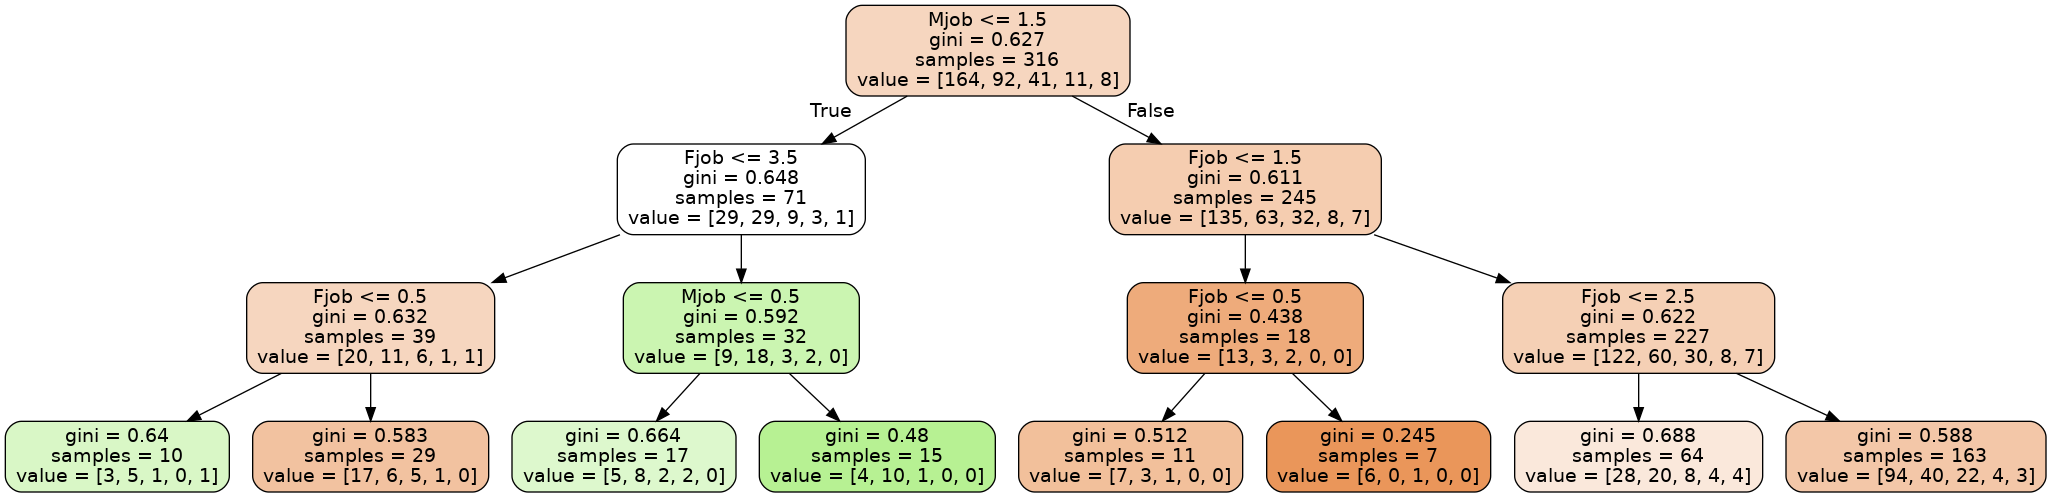

In [463]:
!dot -Tpng DT7.dot -o DT7.png
Image(filename="DT7.png")

Il modello decide di utilizzare il lavoro della madre per suddividere il dataset. Quello che osserviamo è che gli studenti che hanno una madre che insegna o lavora in ambito sanitario (Mjob = 0 or 1)  sono quelli che bevono di meno. Leggendo la parte destra dell'albero si nota che tutti i ragazzi che bevono >3 hanno un padre che ha un lavoro >1. Quelli che non bevono hanno un padre che lavora come insegnante o in ambito sanitario, esattamente come l'attributo lavoro della madre.

Inizio ora ad indagare sulle caratteristiche scolastiche. Prima di tutto osservo la volontà degli studenti di affrontare il corso di studi e quindi se pensano di continuare con l'università, il motivo della scelta della scuola e se seguono corsi extracurriculari.

In [464]:
x = X.loc[:,["higher","reason","activities"]]

X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.2, random_state = 42)

dct = DecisionTreeClassifier(max_depth = 3)
dct.fit(X_train, y_train)

score = dct.score(X_test, y_test)
print("High-Dimensionality Score:", round(score,2))

tree.export_graphviz(dct,
                     out_file='DT8.dot',
                     impurity=True,
                     feature_names=X_test.columns.values,
                     rounded=True,
                     filled=True)


High-Dimensionality Score: 0.66


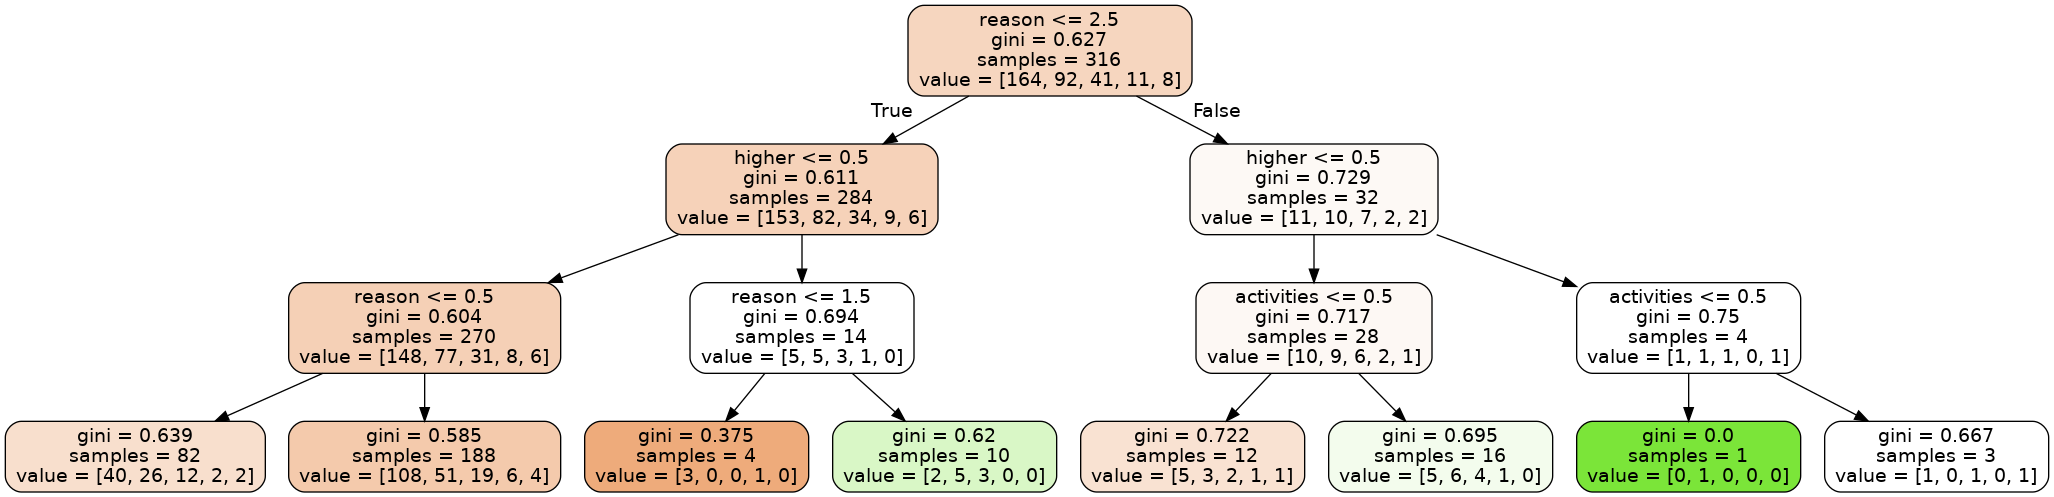

In [465]:
!dot -Tpng DT8.dot -o DT8.png
Image(filename="DT8.png")

Qui abbiamo una suddivisione netta, gli studenti che hanno deciso di andare avanti con l'università sono quelli che bevono di più! Continuando sul lato sinistro dell'albero abbiamo un'altra suddivisione importante: gli studenti che hanno scelto la scuola a seconda della vicinanza a casa, reputazione e preferenza per il corso. In qualsiasi caso risulta difficile arrivare ad una conclusione con questa variabile.

Ora vado ad indagare sull'andamento scolastico.

In [466]:
x = X.loc[:,["failures","G3","activities"]]

X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.2, random_state = 42)

dct = DecisionTreeClassifier(max_depth = 3)
dct.fit(X_train, y_train)

score = dct.score(X_test, y_test)
print("High-Dimensionality Score:", round(score,3))

tree.export_graphviz(dct,
                     out_file='DT9.dot',
                     impurity=True,
                     feature_names=X_test.columns.values,
                     rounded=True,
                     filled=True)


High-Dimensionality Score: 0.595


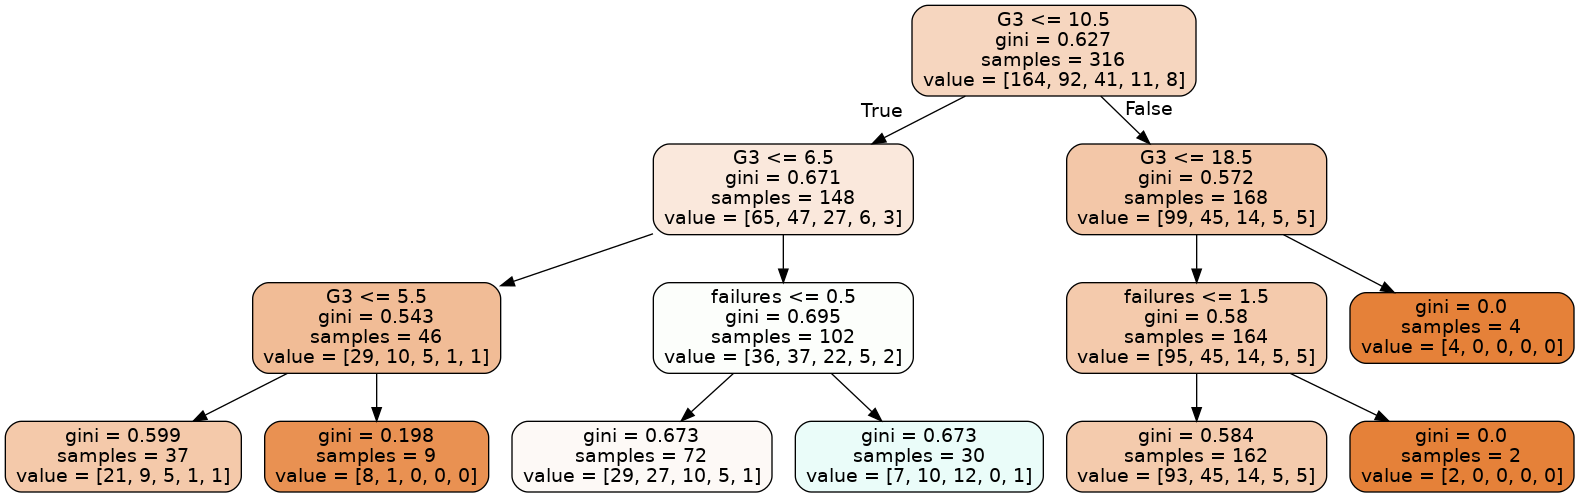

In [467]:
!dot -Tpng DT9.dot -o DT9.png
Image(filename="DT9.png")

Come si può osservare l'albero utilizza la variabile che si riferisce al voto finale per splittare il dataset. La statistica è abbastanza simile dopo la suddivisione e abbiamo che:
<ol>
    <li> Che nella parte di chi ha preso meno di 11 al test è presente il 60% di ragazzi che bevono di più (>=3) </li>
    <li> Nella parte di chi ha preso più di 11 il 40% </li>
    </ol>
A questo punto l'albero utilizza nuovamente la variabile voto finale. Nella parte destra abbiamo che tutti i ragazzi che bevono >1 hanno preso meno di 19 come voto finale. Possiamo concludere che solo i ragazzi che bevono molto poco hanno preso il punteggio massimo. Un'ulteriore informazione è data dall'attributo failures. Infatti continuando a leggere questa parte osserviamo che i ragazzi che hanno avuto più di 1 fallimento sono quelli che bevono molto poco. 
Nella parte sinistra è più complicato perché lo split porta ad una statistica molto diversa. Si ha che nella parte di chi ha preso meno di 7 nel test è presente il 20% di chi beve >=3 mentre si ha 80% di chi ha preso più di 7. 


<a id="esercizio2"></a>
## Esercizio regressione

Questo secondo esercizio richiede di effettuare una regressione lineare con una o più variabili.

Leggendo il dataset `data/adminisson.csv`, caricare i dati gli gli esiti dei vari test di studenti americani. Per ogni studente, il dataset roporta la probabilità di essere ammesso alla scuola a cui ha fatto application.

L'esercizio chiede di creare un modello di regressione che, considerando i risultati dei test, sia in grado di prevedere le probabilità di ammissione.

Il modello deve essere creato con tutte le variabili indipendenti presenti nel dataset *(in questo caso, però, non sarà possibile effettuarne una rappresentazione grafica)*. In questo caso, tuttavia, sarà possibile creare il modello e discuerne la qualità di predizione.

In aggiunta, è richiesto di selezionare il test (o al massimo i 2 test) che correlano maggiormente con la probabilità di essere ammesso alla scuola e quindi di fare una nuova regressione solo con quella (o quelle) variabili in modo che sia rappresentatbile graficamente con un grafico scatter.

In [2]:
data = pd.read_csv("data/admission.csv")

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


<body>
    Dal dataset totale estraggo il mio set di variabili indipendenti e la variabile dipendende <b>Chance of Admit</b> con cui trainerò il modello. Sto attento a droppare la colonna <b>Serial No</b> in quanto questa variabile non deve influire sulla probabilità di ammissione di uno studente. Evito quindi di portarla nel dataset di train in modo che il mio modello non ne risenta.
    Utilizzo la libreria Seaborn per farmi ritornare gli scatter plot tra tutte le variabili.
    </body>
   

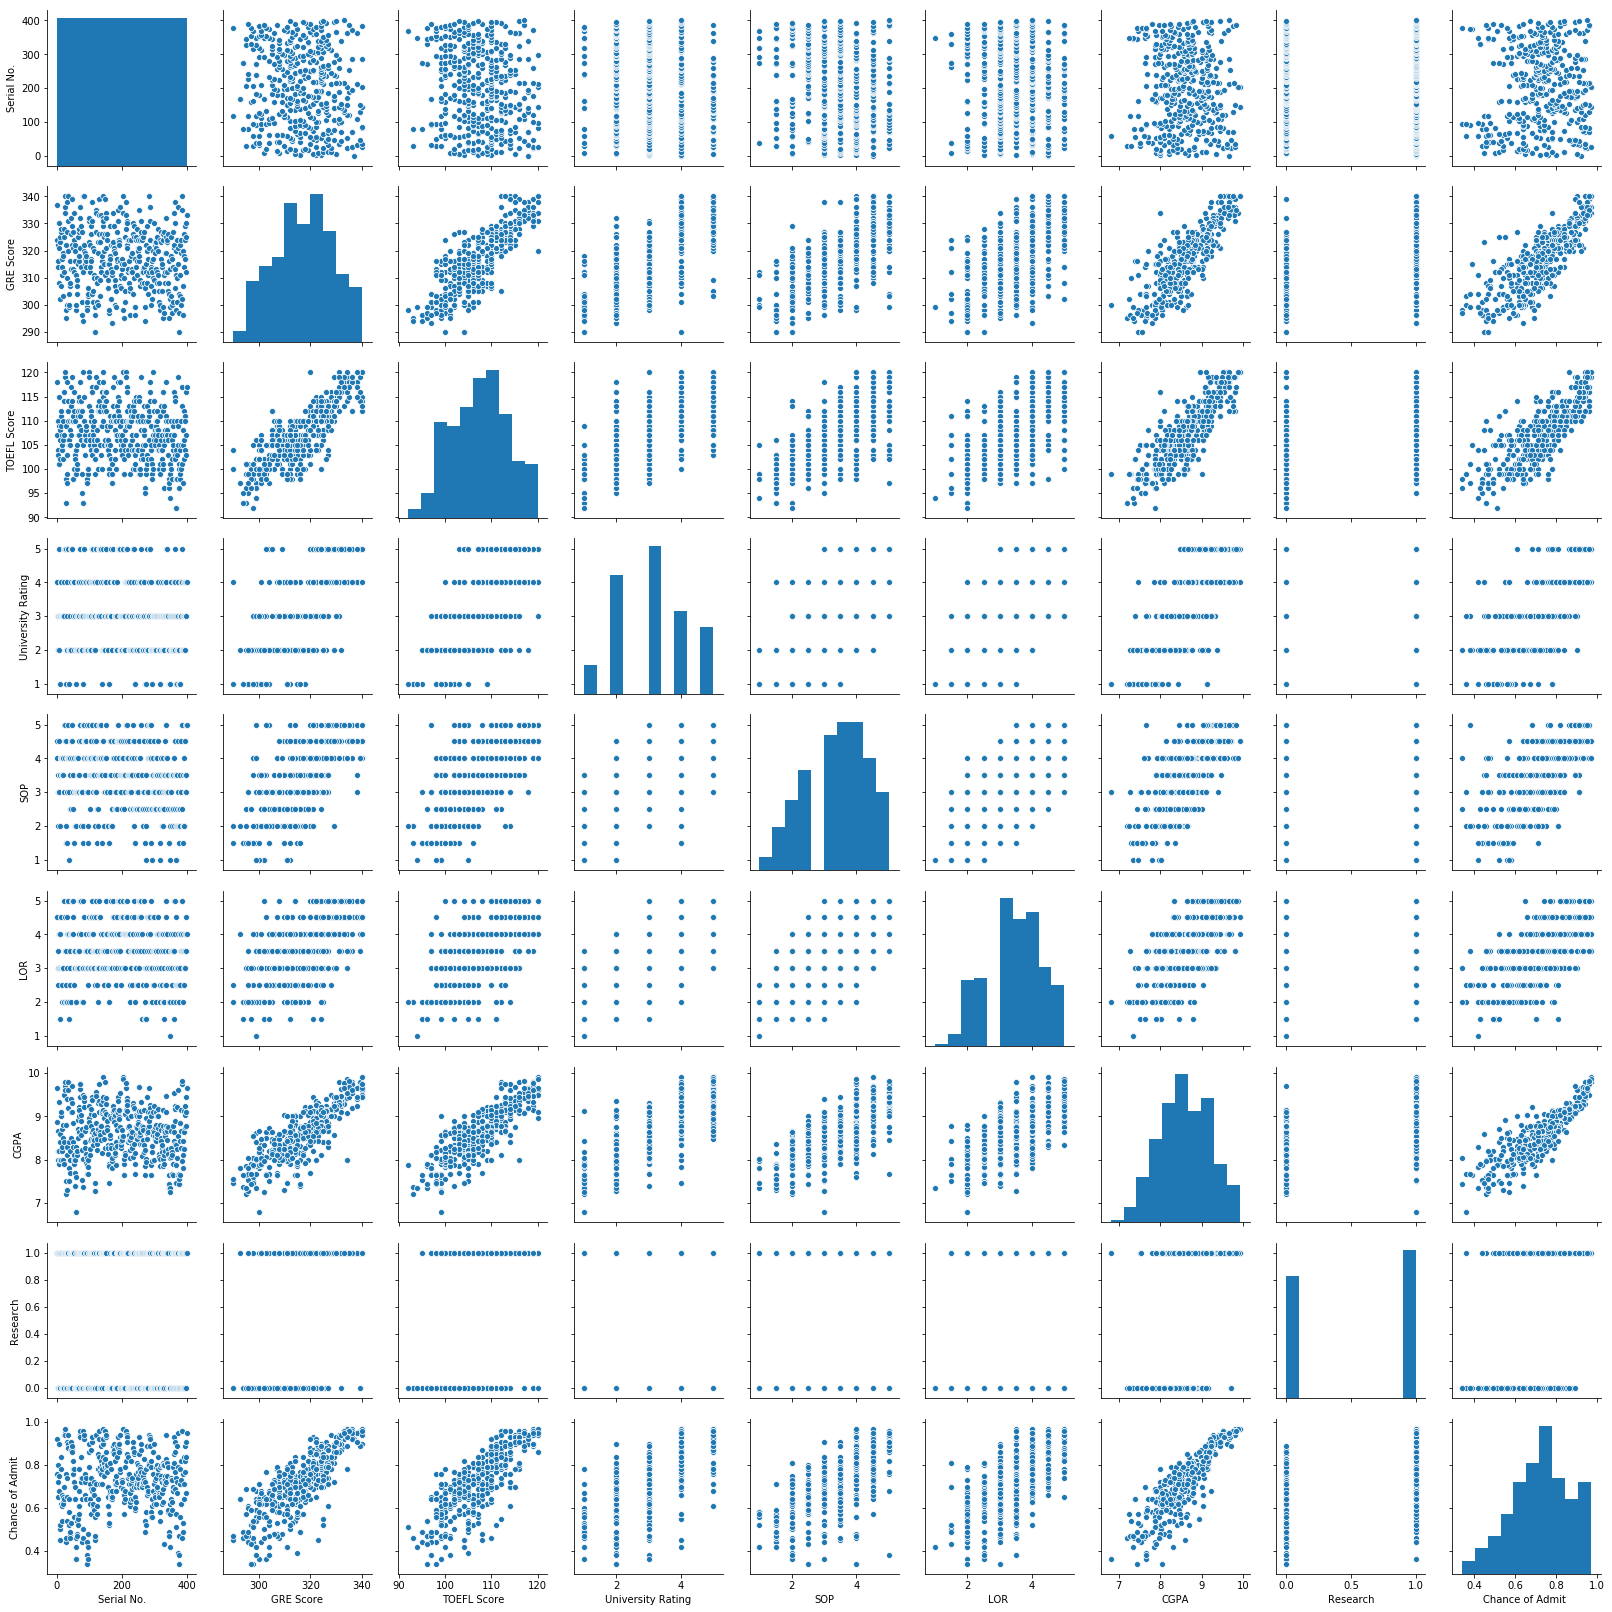

In [5]:
%matplotlib inline
sns.pairplot(data)

Come si può notare abbiamo diverse variabili che sembrano avere una correlazione lineare tra loro

In [529]:
X_data = data.iloc[:,0:-1]
X_data = X_data.drop('Serial No.', axis = 1)

print("Set di variabili indipendenti: \n\n {}\n".format(X_data.head()))

Y_data = data.iloc[:,-1]
print("Variabile dipendente Chance of Admit: \n\n {}".format( Y_data.head() ))

Set di variabili indipendenti: 

    GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0        337          118                  4  4.5   4.5  9.65         1
1        324          107                  4  4.0   4.5  8.87         1
2        316          104                  3  3.0   3.5  8.00         1
3        322          110                  3  3.5   2.5  8.67         1
4        314          103                  2  2.0   3.0  8.21         0

Variabile dipendente Chance of Admit: 

 0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64


<body> 
    Osservando il dataset si può notare che alcuni attributi hanno valori inferiori a 10 e altri maggiori di 300. In modo da evitare che il modello pesi a priori alcuni attributi piuttosto di altri decido di standardizzare tutto quanto. Creo un nuovo dataset dove le variabili hanno media in 0 e deviazione standard unitaria. Per questo scopo utilizzerò il metodo <code>StandardScaler() </code>
    </body>

In [530]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X_data)
X

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

<body>
    Prima di partire con la creazione del modello per la regressione ricordiamo che la validazione del modello è estremamente importante per andare a identificare se il modello è in overtraining o presenta problemi quando gli si presenta un nuovo dataset. Per fare questo decido di dividere le variabili dipendenti e indipendenti in due ulteriori variabili, quelle di train e quelle di test. Su queste ultime andrò a verificare se il mio modello è stato trainato bene. Per fare questo utilizzo il metodo <code> train_test_split </code>
    </body>

In [531]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(X, Y_data, test_size=0.3)

<body>
    Per creare il modello decido di utilizzare la libreria <b>statmodel</b>. Faccio attenzione che utilizzando questa libreria: devo ricordarmi di aggiungere una costante alle variabili indipendenti in modo che il modello sia più flessibile sull'intercetta. Siccome voglio successivamente validare il mio modello sul dataset di test eseguo la stessa procedura anche su questo.
    Per aggiungere la costante utilizzo il metodo <code> add_constant() </code> della libreria statmodel
    </body>

In [532]:
X_train = sm.add_constant(x_train)
X_test = sm.add_constant(x_test)

<body>
    A questo punto posso trainare il mio modello.
    </body>

In [533]:
model = sm.OLS(Y_train, X_train).fit()
print("Model created!")

Model created!


<body>
    Una volta creato il modello mi faccio predire i valori. Eseguo questo sia sul dataset di trai che su quello di test e poi andrò a confrontare i risultati per verificare la bontà del modello.
    </body>

In [534]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Predictions done!")

Predictions done!


<body>
    Per verificare la bontà del modello vado ad utilizzare une metrica che mi permette di osservare quanto le predizioni del mio modello sia avvicinano ai valori corretti. Utilizzerò <b>R2 score</b>. Questo coefficiente si può vedere come una versione standardizzata della metrica <b> Mean squared error </b>. R2 score ritorna un valore compreso tra 0 e 1. Se il modello ritorna un R2 score vicino a 1 significa che il modello è buono.
    </body>

In [535]:
r2_score_train = r2_score(Y_train, y_pred_train)
r2_score_test = r2_score(Y_test, y_pred_test)

print("R2 train: %f" % r2_score_train)
print("R2 test: %f" % r2_score_test)

R2 train: 0.803539
R2 test: 0.797277


<body>
    Vediamo che i due R2 score sono abbastanza alti e inoltre abbastanza simili. Possiamo dire che il modello è buono, ma si potrebbe fare uno studio sulle variabili indipendenti per trainare in modo migliore il modello. Provo a fare questo successivamente
    </body>

In [536]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     158.9
Date:                Fri, 24 May 2019   Prob (F-statistic):           2.99e-92
Time:                        14:22:59   Log-Likelihood:                 377.05
No. Observations:                 280   AIC:                            -738.1
Df Residuals:                     272   BIC:                            -709.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7284      0.004    189.544      0.000       0.721       0.736
x1             0.0176      0.008      2.112      0.036       0.001       0.034
x2             0.0211      0.008      2.590      0.010       0.005       0.037
x3             0.0019      0.007      0.287      0.774      -0.011       0.015
x4          4.316e-05      0.007      0.007      0.995      -0.013       0.013
x5             0.0196      0.006      3.302      0.001       0.008       0.031
x6             0.0691      0.009      7.962      0.000       0.052       0.086
x7             0.0142      0.005      2.996      0.003       0.005       0.024
==============================================================================
Omnibus:                       86.288   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.712
Skew:                          -1.454   Prob(JB):                     6.46e-47
Kurtosis:                       6.126   Cond. No.                         6.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Scelgo meno variabili in train in modo da poter osservare i risultati visivamente.

<body>
    Un modo per andare ad analizzare le variabili indipendenti è quello di guardare la <b>correlazione</b> che hanno con la variabile indipendente per andare a osservare se ci può essere una funzione lineare che leghi le variabili. Possiamo farci ritornare la matrice di correlazione dal dataset e andare ad osservare le variabili che sono più correlate con quella dipendente.
    </body>

In [537]:
correlation_matrix = data.corr()
correlation_matrix_noSer = data.drop(["Serial No."], axis = 1).corr()


In [538]:
correlation_matrix

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


Utilizzo nuovamente la libreria Seaborn per farmi plottare le matrici di correlazione e avere un'idea della correlazione tra le diverse variabili

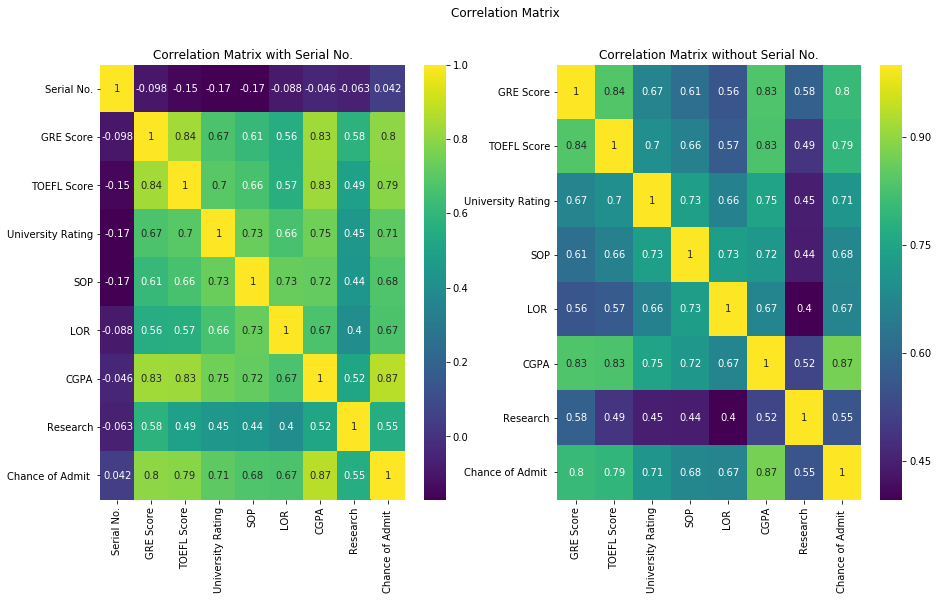

In [547]:
cmap_col = "viridis"
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1,2,1)
plt.suptitle("Correlation Matrix")
plt.title("Correlation Matrix with Serial No.")
sns.heatmap(data.corr(), annot = True, cmap = cmap_col)
ax = fig.add_subplot(1,2,2)
plt.title("Correlation Matrix without Serial No.")
sns.heatmap(correlation_matrix_noSer, annot = True, cmap = cmap_col)

In [54]:
corr = correlation_matrix.iloc[:-1,-1]
correlation_matrix.index[:-1]

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research'],
      dtype='object')

<body>
    Quello su cui vogliamo focalizzarci è l'ultima colonna, ovvero quella di correlazione con la variabile <b>Chance of Admit</b>. Tolgo la correlazione con se stessa perché so già essere 1.

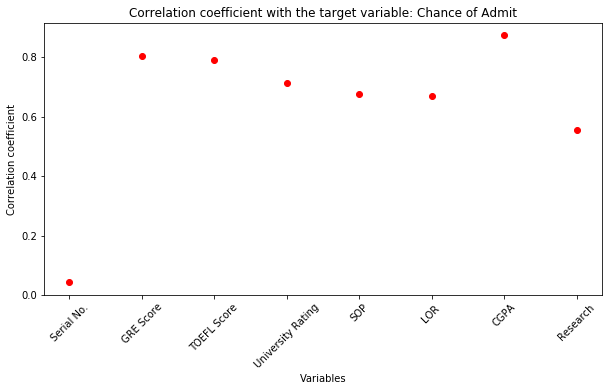

In [55]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)


ax.plot(correlation_matrix[:-1].index,corr, 'o', color = 'red')
ax.set_xticklabels(correlation_matrix.index[:-1],rotation = 45)
plt.title("Correlation coefficient with the target variable: Chance of Admit")
plt.ylabel("Correlation coefficient")
plt.xlabel("Variables")
plt.show()

<body>
    Come si può vedere dal plot abbiamo confermato che la variable Serial No. non ha correlazioni con la variabile di target.
    Osserviamo che le altre variabili hanno una correlazione molto alta. Decido di scegliere le due variabili che hanno la correlazione più alta.
    </body>

<body>
    Vediamo che le due variabili con la correlazione maggiore sono <b>GRE score</b> e <b>CGPA</b>. Decido di usare quindi queste per creare il modello.
    </body>

In [57]:
x_corr = data.loc[:,["GRE Score","CGPA"]]
grescore = x_corr.iloc[:,0]
cgpa = x_corr.iloc[:,1]

Text(0.5, 0, 'CGPA')

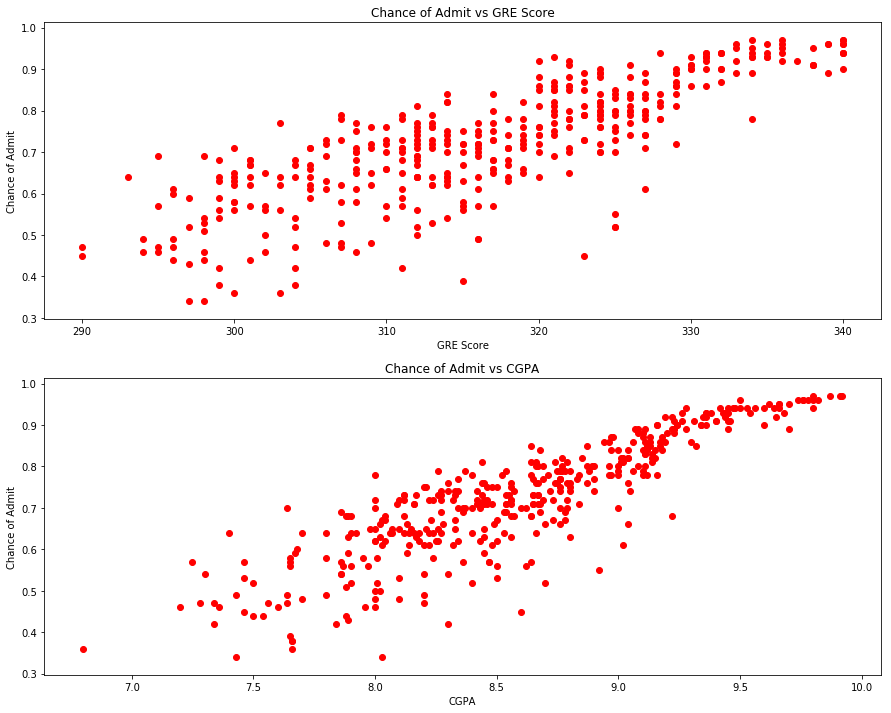

In [58]:
fig = plt.figure(figsize = (15,12))

ax = fig.add_subplot(2,1,1)
ax.scatter(x_corr.iloc[:,0], Y_data, color = 'red')
plt.title("Chance of Admit vs GRE Score")
plt.ylabel("Chance of Admit")
plt.xlabel("GRE Score")
ax = fig.add_subplot(2,1,2)
ax.scatter(x_corr.iloc[:,1], Y_data, color = 'red')
plt.title("Chance of Admit vs CGPA")
plt.ylabel("Chance of Admit")
plt.xlabel("CGPA")

Model created!
Predictions done!
R2 train: 0.640041
R2 test: 0.649384


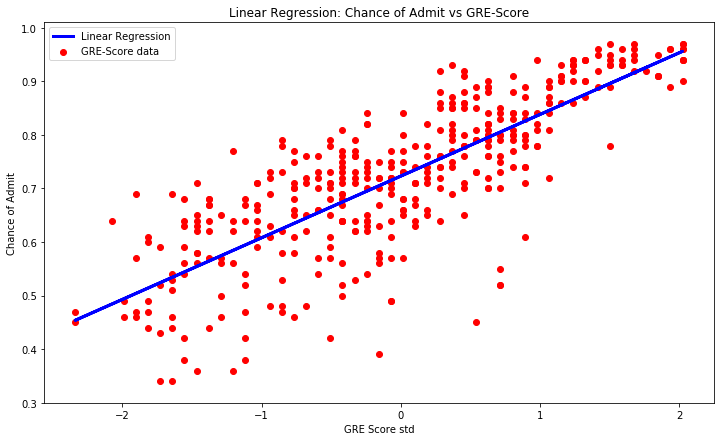

In [128]:
scaler = StandardScaler()

grescore = np.array(grescore).reshape(-1,1)
X = scaler.fit_transform(grescore)

x_train_g, x_test_g, Y_train_g, Y_test_g = train_test_split(X, Y_data, test_size=0.3)
X_train_g = sm.add_constant(x_train_g)
X_test_g = sm.add_constant(x_test_g)

model_g = sm.OLS(Y_train_g, X_train_g).fit()
print("Model created!")

y_pred_train_g = model_g.predict(X_train_g)
y_pred_test_g = model_g.predict(X_test_g)
print("Predictions done!")

r2_score_train_g = r2_score(Y_train_g, y_pred_train_g)
r2_score_test_g = r2_score(Y_test_g, y_pred_test_g)

print("R2 train: %f" % r2_score_train_g)
print("R2 test: %f" % r2_score_test_g)
y_plot_g = model_g.params['x1']*X + model_g.params['const']
fig = plt.figure(figsize = (12,7))
plt.scatter(X, Y_data, color = 'red', label = 'GRE-Score data')
plt.plot(X,y_plot_g, color = 'blue', linewidth = 3, label = "Linear Regression")
plt.title("Linear Regression: Chance of Admit vs GRE-Score")
plt.xlabel("GRE Score std")
plt.ylabel("Chance of Admit")
plt.legend()


Model created!
Predictions done!
R2 train: 0.754441
R2 test: 0.766884


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     881.4
Date:                Fri, 24 May 2019   Prob (F-statistic):           3.40e-88
Time:                        14:59:30   Log-Likelihood:                 345.79
No. Observations:                 280   AIC:                            -687.6
Df Residuals:                     278   BIC:                            -680.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7227      0.004    171.206      0.000       0.714       0.731
x1             0.1261      0.004     29.689      0.000       0.118       0.134
==============================================================================
Omnibus:                       44.809   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.786
Skew:                          -0.900   Prob(JB):                     3.49e-17
Kurtosis:                       4.804   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

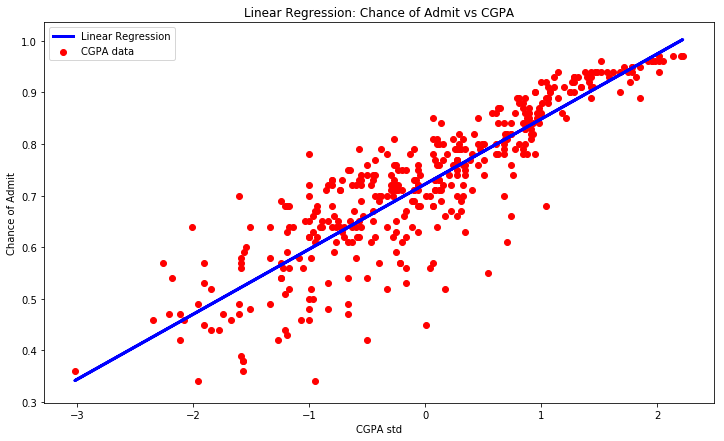

In [608]:
scaler = StandardScaler()

cgpa = np.array(cgpa).reshape(-1,1)
X = scaler.fit_transform(cgpa)

x_train_cg, x_test_cg, Y_train_cg, Y_test_cg = train_test_split(X, Y_data, test_size=0.3)
X_train_cg = sm.add_constant(x_train_cg)
X_test_cg = sm.add_constant(x_test_cg)

model_cg = sm.OLS(Y_train_cg, X_train_cg).fit()
print("Model created!")

y_pred_train_cg = model_g.predict(X_train_cg)
y_pred_test_cg = model_g.predict(X_test_cg)
print("Predictions done!")

r2_score_train_cg = r2_score(Y_train_cg, y_pred_train_cg)
r2_score_test_cg = r2_score(Y_test_cg, y_pred_test_cg)

print("R2 train: %f" % r2_score_train_cg)
print("R2 test: %f" % r2_score_test_cg)

y_plot_cg = model_cg.params['x1']*X + model_cg.params['const']
fig = plt.figure(figsize = (12,7))
plt.scatter(X, Y_data, color = 'red', label = 'CGPA data')
plt.plot(X,y_plot_cg, color = 'blue', linewidth = 3, label = "Linear Regression")
plt.title("Linear Regression: Chance of Admit vs CGPA")
plt.xlabel("CGPA std")
plt.ylabel("Chance of Admit")
plt.legend()


model_cg.summary()

<body>
    Come si può notare anche dai plot la correlazione tra le variabili è molto alta e si può facilmente immaginare una retta che approssimi queste distribuzioni.
    Si può osservare che il modello è migliore con la variabile indipende <b>CGPA</b>, si nota anche dal plot che i dati sono meno dispersi rispetto allo scatter plot con la variabile <b>GRE score </b>
    </body>

Creo un modello con entrambe queste variabili. Prima di tutto eseguo uno scatter plot 3D per visualizzare i dati.

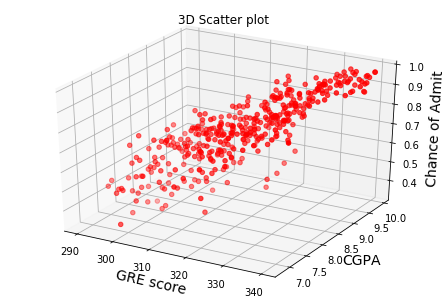

In [138]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib inline
#from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
plt3d = fig.gca(projection='3d')

ax = Axes3D(fig)
ax.scatter(grescore, cgpa, Y_data, color='red')
ax.set_xlabel('GRE score', fontsize=14)
ax.set_ylabel('CGPA', fontsize=14)
ax.set_zlabel('Chance of Admit', fontsize=14)
plt.title("3D Scatter plot")

plt.show()

In [139]:
Y_data = np.array(Y_data)
Y_data = Y_data.reshape(-1,1)
Y_data.shape

(400, 1)

<body>
    Creo il modell andando ad utilizzare queste due variabili.
    </body>

In [140]:
scaler = StandardScaler()
X = scaler.fit_transform(x_corr)

In [609]:
x_train_c, x_test_c, Y_train_c, Y_test_c = train_test_split(X, Y_data, test_size=0.3)
X_train_c = sm.add_constant(x_train_c)
X_test_c = sm.add_constant(x_test_c)

model_c = sm.OLS(Y_train_c, X_train_c).fit()
print("Model created!")

y_pred_train_c = model_c.predict(X_train_c)
y_pred_test_c = model_c.predict(X_test_c)
print("Predictions done!")

r2_score_train_c = r2_score(Y_train_c, y_pred_train_c)
r2_score_test_c = r2_score(Y_test_c, y_pred_test_c)

print("R2 train: %f" % r2_score_train_c)
print("R2 test: %f" % r2_score_test_c)


model_c.summary()

Model created!
Predictions done!
R2 train: 0.781339
R2 test: 0.710005


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     993.4
Date:                Fri, 24 May 2019   Prob (F-statistic):           9.14e-94
Time:                        14:59:50   Log-Likelihood:                 356.55
No. Observations:                 280   AIC:                            -709.1
Df Residuals:                     278   BIC:                            -701.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7206      0.004    177.393      0.000       0.713       0.729
x1             0.1255      0.004     31.518      0.000       0.118       0.133
==============================================================================
Omnibus:                       46.000   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.740
Skew:                          -0.958   Prob(JB):                     1.60e-16
Kurtosis:                       4.601   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

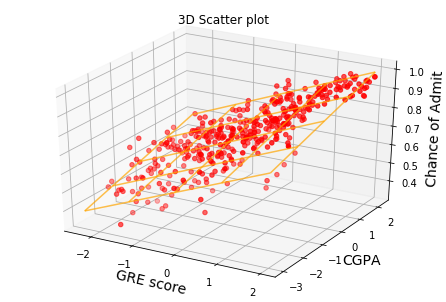

In [142]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
plt3d = fig.gca(projection='3d')

ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], Y_data, color='red')
ax.set_xlabel('GRE score', fontsize=14)
ax.set_ylabel('CGPA', fontsize=14)
ax.set_zlabel('Chance of Admit', fontsize=14)
plt.title("3D Scatter plot")

x = np.linspace(X[:,0].min(), X[:,0].max(), 5)
y = np.linspace(X[:,1].min(), X[:,1].max(), 5)
x, y = np.meshgrid(x, y)

z = model_c.params[0] + model_c.params[2] * x + model_c.params[1] * y
z = z.reshape(x.shape)

ax.plot_wireframe(x, y, z, color='orange', alpha=0.7)

plt.show()

<a id="esercizio3"></a>
## Esercizio clustering e classificazione con NN

In questo terzo esercizio viene proposso un esercizio di clusterizzazione e di predizione con Rete Neurale.

Da principio, per questo esercizio, leggiamo il dataset `data/wine.csv`, che contiene le caratteristiche di alcune tipologie di vino. I dati contengono i seguenti attributi:

- Alcohol 
- Malic acid 
- Ash 
- Alcalinity of ash 
- Magnesium 
- Total phenols 
- Flavanoids 
- Nonflavanoid phenols 
- Proanthocyanins 
- Color intensity 
- Hue 
- OD280/OD315 of diluted wines 
- Proline 

L'esercizio chiede quindi di provare a prendere questi dati e di farne una clusterizzazione.
Le dimensioni da usare per la clusterizzazione, e per la rappresentazione scatter, sono `phenols` e `alcohol`.

Quanti gruppi convinene creare? Per scegliere questa dimensione è necessario utilizzare il metodo elbow o il metodo silhouette.
Rappresentare i dati clusterizzati.

Dopo aver fatto questa clusterizzazione è possibile leggere il dataset `data/wine-with-answers.csv`. Questo dataset è uguale al precedente ma aggiunge una colonna, la colonna `class`. Questa colonna rappresenta una classificazione dei vini fatta da un esperto enologo in tre classi (1, 2 o 3) in base alle caratteristiche del vino stesso.

L'esercizio chiede a questo punto di creare una rete neurale in grado di apprendere in modo supervised le classificazioni dei vini partendo dai loro 13 attributi.

Creare il modello, farlo apprendere e valutarne l'accuratezza su un insieme di test dei dati.

In [549]:
%matplotlib inline
data = pd.read_csv("data/wine.csv")
data

,alcohol,malic_acid,ash,alcalinity_ash,agnesium,phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.2,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


<body>
        Osservando il dataset ho notato che a riga 171 c'è un valore strano per l'attributo <b>color_intensity</b>. Decido di fare un check per vedere se ci sono altri valori strani. Ho bisogno di convertire tutte le entrate in float siccome alcuni valori sono in formato stringa. Creo un ciclo che scorre su tutte le righe e per ogni riga controlla le entrate. Fisso una soglia a 3000, se trovo valori sopra i 3000 vado ad osservare se ce ne sono tanti, se così dovesse essere aumento la soglia e controllo gli outliers.
    </body>

In [552]:
c = len(data.index)
for i in range(0,c):
    
    col_num = 0
    arr_t = np.array((data.iloc[i,:].values))
    
    for j in arr_t:
        
        try:
            j_float = float(j)
            
            if(j_float > 3000):
                print(i)
            
        except ValueError:
            print("ValueError: Valore strano: {} a riga - colonna: {}".format(j, (i,col_num)))
            continue
            
        col_num = col_num + 1

        

ValueError: Valore strano: 9.899.999 a riga - colonna: (171, 9)


<body>
    Con il ciclo l'unico valore fuori luogo è quello che si vedeva all'inizio. Decido di droppare quella riga in modo da non influenzare il modello.
    </body>

In [553]:
data_clean = data.drop(171)

Text(0, 0.5, 'Alcohol')

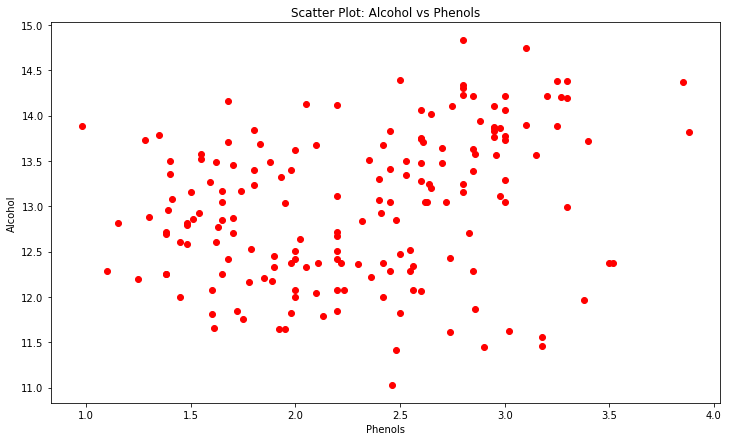

In [556]:
fig = plt.figure(figsize = (12,7))

plt.scatter(data_clean['phenols'], data_clean['alcohol'], color = 'red')
plt.title("Scatter Plot: Alcohol vs Phenols")
plt.xlabel("Phenols")
plt.ylabel("Alcohol")

<body>
    Osservando questo scatter risulta difficile individuare quanti cluster potrebbero esserci. Utilizzo il metodo elbow in modo da minimizzare l'inertia e capire quanti cluster ci possono essere
    </body>

In [147]:
x = data_clean[['phenols',"alcohol"]]

In [148]:
kmeans = KMeans(3)


In [149]:
wcss = []

max_cluster = 10

pbar = tqdm_notebook(range(max_cluster-1), desc = "Loop over clusters")

for i in range(1,10):
         
    kmeans = KMeans(i)
    
    kmeans.fit(x)
    
    wcss_temp = kmeans.inertia_
    
    wcss.append(wcss_temp)
    
    pbar.update()

pbar.close()

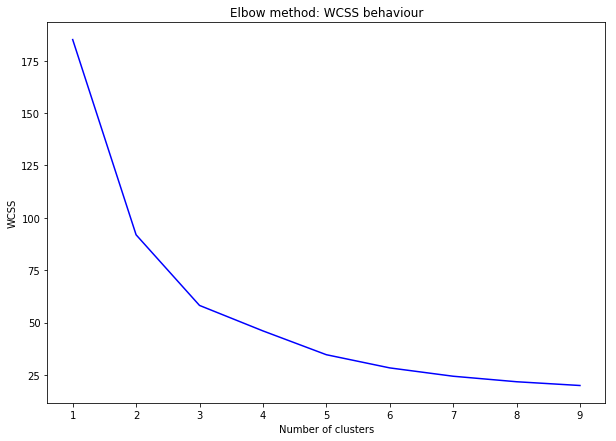

In [557]:
n_cluster = np.arange(1,10,1)

fig = plt.figure(figsize = (10,7))
plt.title("Elbow method: WCSS behaviour")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.plot(n_cluster,wcss, color = "blue")

<body>
    Il numero ottimale si trova dove l'andamento subisce la deviazione più significativa, ovvero il punto che mi dice che aggiungendo un ulteriore cluster il metodo non guadagna <b>inertia</b>. In questo caso il punto si trova a 3 cluster. Provo quindi a fare una clusterizzazione con 3 cluster e poi visualizzo i risultati per farmi un'idea di come ha lavorato il modello
    </body>

In [151]:
kmean = KMeans(3)

kmean.fit(x)

cluster_pred = kmean.fit_predict(x)

data_clust = data_clean.copy()
data_clust['Cluster'] = cluster_pred
data_clust.head()

,alcohol,malic_acid,ash,alcalinity_ash,agnesium,phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted,proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


<body>
    Per avere un'idea migliore di come ha lavorato mi faccio plottare anche i centroidi di ogni cluster in modo da osservare se ci sono comportamenti anomali.
    </body>

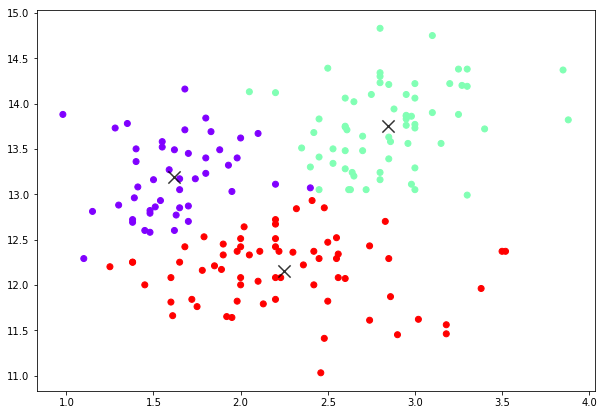

In [152]:
centroids = kmean.cluster_centers_

fig = plt.figure(figsize = (10,7))

plt.scatter(data_clust["phenols"],data_clust['alcohol'],\
           c = data_clust["Cluster"], cmap = 'rainbow')
plt.scatter(centroids[:,0], centroids[:,1], marker = "x",c = 'black',alpha=0.8, linewidths=3, s=150)

In [153]:
from sklearn import preprocessing

# scale the data for better results

x = preprocessing.scale(x)

%matplotlib inline

For n_clusters = 2 The average silhouette_score is : 0.4365964262105427
For n_clusters = 3 The average silhouette_score is : 0.44605335347572034
For n_clusters = 4 The average silhouette_score is : 0.41832949033973077
For n_clusters = 5 The average silhouette_score is : 0.3894987858829511
For n_clusters = 6 The average silhouette_score is : 0.38456803262546474
For n_clusters = 7 The average silhouette_score is : 0.3714750140382979
For n_clusters = 8 The average silhouette_score is : 0.3495883772818919
For n_clusters = 9 The average silhouette_score is : 0.35110792324064466
For n_clusters = 10 The average silhouette_score is : 0.3424332504990986


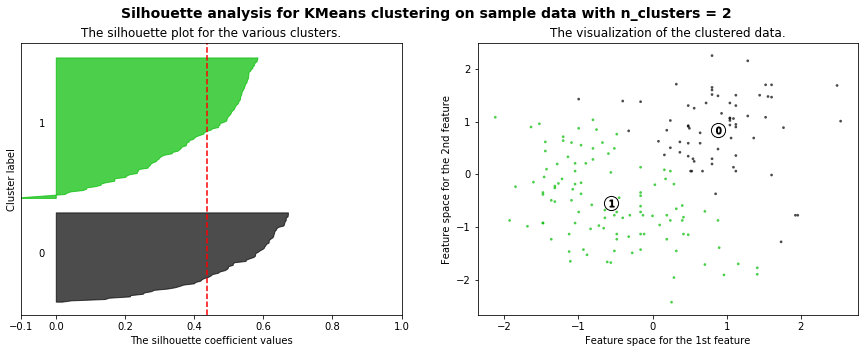

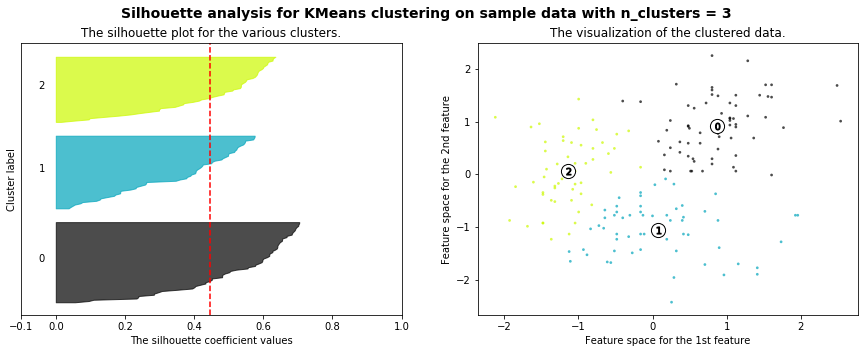

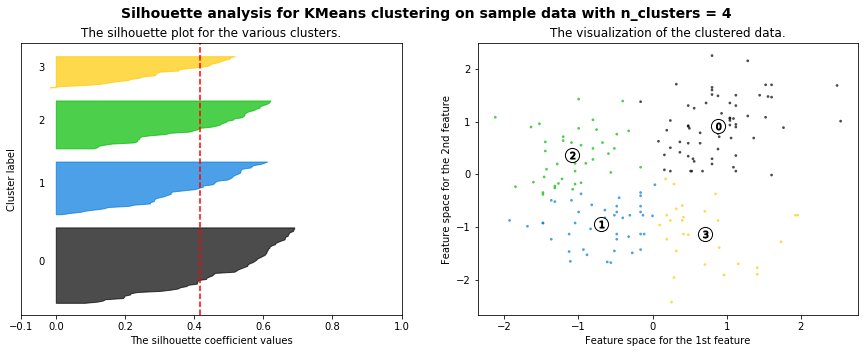

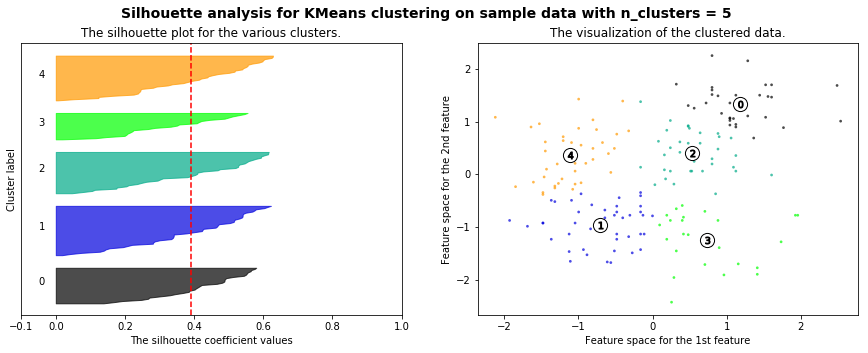

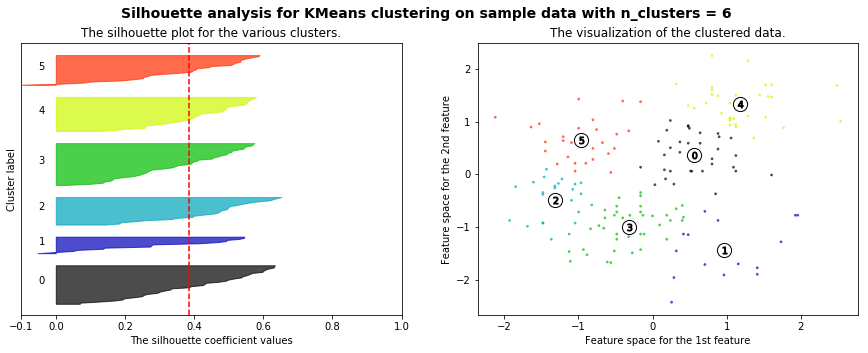

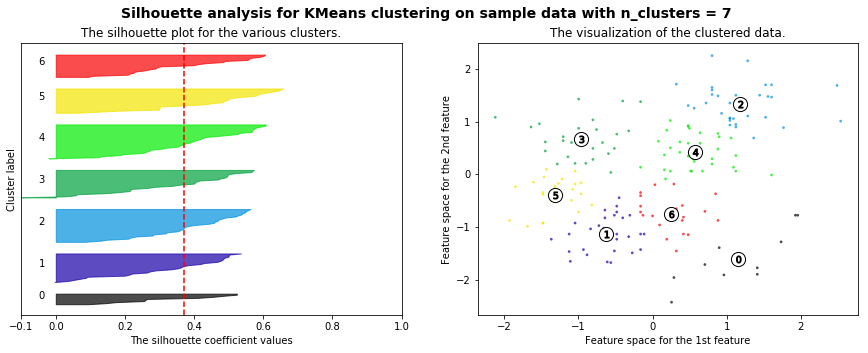

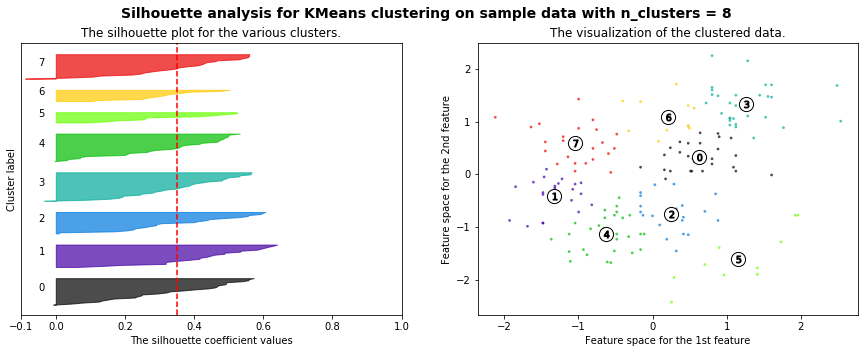

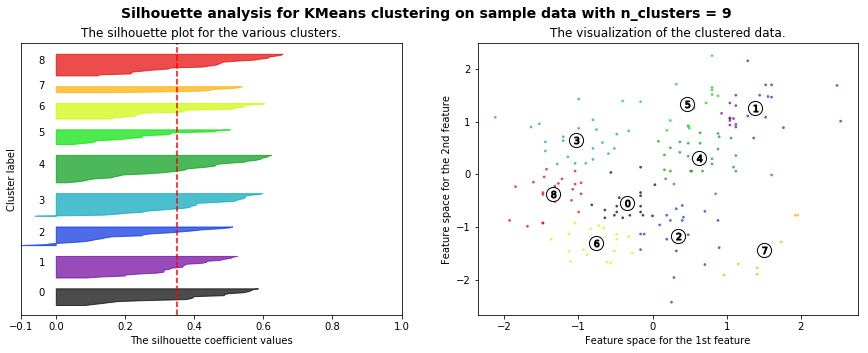

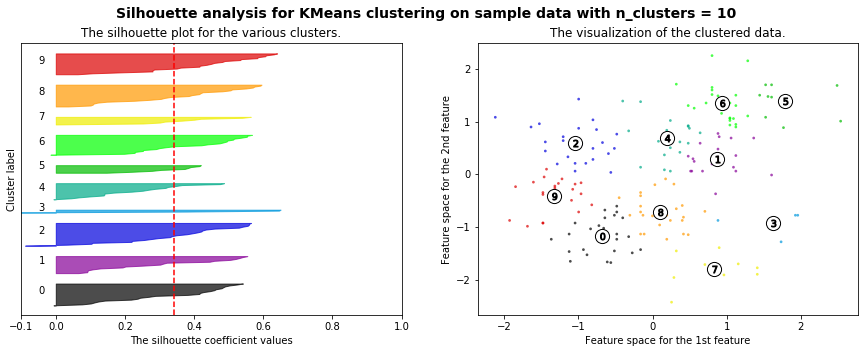

In [154]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = np.arange(2,11,1)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    cluster_labels = clusterer.fit_predict(x)
    
    silhouette_avg = silhouette_score(x, cluster_labels)
    sample_silhouette_values = silhouette_samples(x, cluster_labels)
    
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

<body>
    Carico il dataset con i risultati ottenuti dall'esperto enologo e confronto con i quelli appena ottenuti dalla clusterizzazione
    </body>

In [155]:
data_answer = pd.read_csv("./data/wine-with-answers.csv")

In [156]:
data_answer.head()

,class,alcohol,malic_acid,ash,alcalinity_ash,agnesium,phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735




<body>
    Siccome con il dataset precedente ho trovato un valore strano faccio un check anche su questo in modo da non avere problemi
    </body>

In [157]:
c = len(data_answer.index)
for i in range(0,c):
    
    col_num = 0
    arr_t = np.array((data_answer.iloc[i,:].values))
    
    for j in arr_t:
        
        try:
            j_float = float(j)
            
            if(j_float > 3000):
                print(i)
            
        except TypeError:
            print("Valore strano: {} a riga - colonna: {}".format(j, (i,col_num)))
            
        col_num = col_num + 1

        

<body>
    In questo non sono stati trovati valori strani, procedo con lo studio
    </body>

Text(0.5, 1.0, 'Clusterization done with ML')

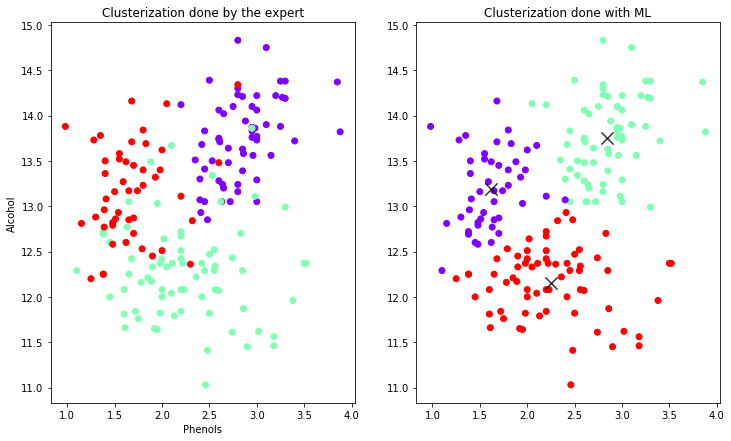

In [158]:

#centroids = kmean.cluster_centers_

fig = plt.figure(figsize = (12,7))
ax = fig.add_subplot(1,2,1)

ax.scatter(data_answer["phenols"],data_answer['alcohol'],\
           c = data_answer["class"], cmap = 'rainbow')
plt.xlabel("Phenols")
plt.ylabel("Alcohol")
plt.title("Clusterization done by the expert")
ax = fig.add_subplot(1,2,2)
plt.scatter(data_clust["phenols"],data_clust['alcohol'],\
           c = data_clust["Cluster"], cmap = 'rainbow')
plt.scatter(centroids[:,0], centroids[:,1], marker = "x",c = 'black',alpha=0.8, linewidths=3, s=150)
plt.title("Clusterization done with ML")
#plt.scatter(centroids[:,0], centroids[:,1], marker = "x",c = 'black',alpha=0.8, linewidths=3, s=150)

<body>
    Come si può osservare il modello ha lavorato bene, sono presenti alcune eccezioni che un algoritmo di clusterizzazione non riesce ad identificare. Provo con una rete neurale in modo supervised e cerco di capire se riesce ad identificare queste eccezioni.
    </body>

In [585]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import StandardScaler, LabelBinarizer

In [586]:
data_answer.columns

Index(['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_ash', 'agnesium',
       'phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
       'color_intensity', 'hue', 'diluted', 'proline   '],
      dtype='object')

In [587]:
X = data_answer.iloc[:,1:]
Y = data_answer.iloc[:,0]

lb = LabelBinarizer()

X = StandardScaler().fit_transform(X)

y = lb.fit_transform(Y)


In [597]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)



In [589]:
x_train

array([[ 1.60508109, -0.37374054,  1.29210141, ...,  0.49379744,
         0.05411719,  1.69767508],
       [-0.81603824,  0.10202093,  0.34171277, ..., -0.69078402,
         1.08520045, -0.98366865],
       [ 0.49334262,  1.41260912,  0.41481959, ..., -1.12951789,
        -1.48544548,  0.0098934 ],
       ...,
       [-0.77898029, -1.01108137,  0.70724686, ...,  1.02027808,
        -0.44023779, -0.21939015],
       [ 0.35746347, -0.32885738,  1.14588777, ...,  0.49379744,
         0.32248133,  1.66583014],
       [ 0.39452142,  0.81117481,  0.0492855 , ..., -1.78761869,
        -1.40069891, -0.30855597]])

In [590]:
model = Sequential()

model.add(Dense(100, input_dim = x_train.shape[-1], activation = 'relu'))

model.add(Dense(units = 3, activation = 'softmax'))

In [591]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=120, validation_data=(x_test, y_test))

Train on 124 samples, validate on 54 samples
Epoch 1/120
124/124 [==============================] - 1s 4ms/sample - loss: 1.2977 - acc: 0.1613 - val_loss: 1.2246 - val_acc: 0.2222
Epoch 2/120
124/124 [==============================] - 0s 96us/sample - loss: 1.1349 - acc: 0.3306 - val_loss: 1.0860 - val_acc: 0.3519
Epoch 3/120
124/124 [==============================] - 0s 166us/sample - loss: 0.9957 - acc: 0.4919 - val_loss: 0.9609 - val_acc: 0.5741
Epoch 4/120
124/124 [==============================] - 0s 121us/sample - loss: 0.8706 - acc: 0.6210 - val_loss: 0.8526 - val_acc: 0.6852
Epoch 5/120
124/124 [==============================] - 0s 186us/sample - loss: 0.7656 - acc: 0.7419 - val_loss: 0.7581 - val_acc: 0.7222
Epoch 6/120
124/124 [==============================] - 0s 187us/sample - loss: 0.6743 - acc: 0.8226 - val_loss: 0.6763 - val_acc: 0.8519
Epoch 7/120
124/124 [==============================] - 0s 120us/sample - loss: 0.5965 - acc: 0.8710 - val_loss: 0.6062 - val_acc: 0.8704

124/124 [==============================] - 0s 254us/sample - loss: 0.0390 - acc: 1.0000 - val_loss: 0.0703 - val_acc: 0.9815
Epoch 61/120
124/124 [==============================] - 0s 121us/sample - loss: 0.0379 - acc: 1.0000 - val_loss: 0.0691 - val_acc: 0.9815
Epoch 62/120
124/124 [==============================] - 0s 132us/sample - loss: 0.0370 - acc: 1.0000 - val_loss: 0.0681 - val_acc: 0.9815
Epoch 63/120
124/124 [==============================] - 0s 132us/sample - loss: 0.0359 - acc: 1.0000 - val_loss: 0.0669 - val_acc: 0.9815
Epoch 64/120
124/124 [==============================] - 0s 123us/sample - loss: 0.0350 - acc: 1.0000 - val_loss: 0.0657 - val_acc: 0.9815
Epoch 65/120
124/124 [==============================] - 0s 133us/sample - loss: 0.0341 - acc: 1.0000 - val_loss: 0.0646 - val_acc: 0.9815
Epoch 66/120
124/124 [==============================] - 0s 131us/sample - loss: 0.0333 - acc: 1.0000 - val_loss: 0.0633 - val_acc: 0.9815
Epoch 67/120
124/124 [=========================

124/124 [==============================] - 0s 141us/sample - loss: 0.0114 - acc: 1.0000 - val_loss: 0.0304 - val_acc: 0.9815
Epoch 120/120
124/124 [==============================] - 0s 208us/sample - loss: 0.0112 - acc: 1.0000 - val_loss: 0.0302 - val_acc: 0.9815


In [166]:
def loss_plotter(history):
    
    '''    Questa funzione permette di plottare le funzioni di loss
    per train e test. L'argomento da passare è la history del modello    
    '''    
    fig = plt.figure(figsize = (12,7))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss")
    plt.legend(['Train','Test'])
    plt.show()
    
def acc_plotter(history):
    
    ''' Questa funzione permette di plottare le funzioni di accuracy
    per train e test. L'argomento da passare è la history del modello    
    '''
    
    fig = plt.figure(figsize = (12,7))
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.legend(["Train","Test"])
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")

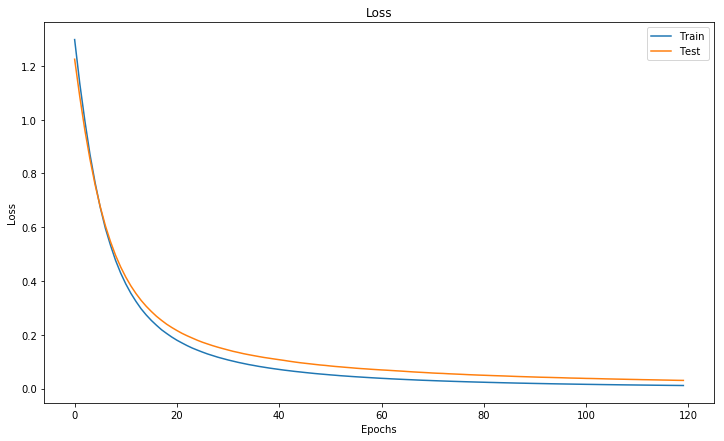

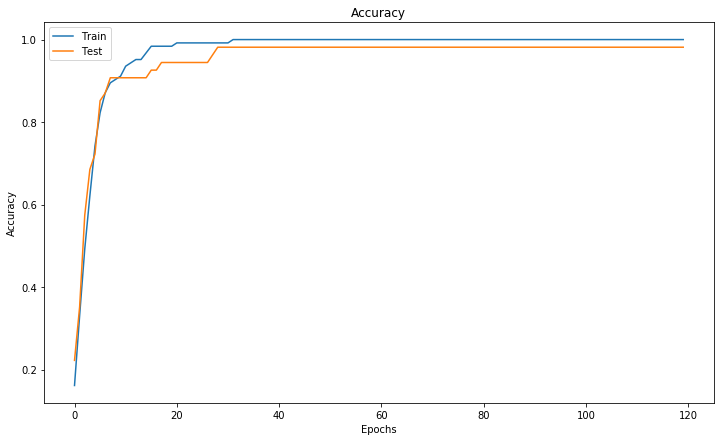

In [592]:
loss_plotter(history)
acc_plotter(history)

In [593]:
print("Maximum accuracy value: {}".format(max(history.history["val_acc"])))
print("Minimum loss value: {}".format(min(history.history["val_loss"])))

Maximum accuracy value: 0.9814814925193787
Minimum loss value: 0.030166408116066898


In [194]:
import multiprocessing
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def create_model(n_layer ,neurons, activation, optimizer = "sgd"):
    
    model = Sequential()
    
    model.add(Dense(neurons, input_dim = 13, activation = activation))
    
    for i in range(0,n_layer):  
        
        
         model.add(Dense(neurons, activation = activation))  

            
    
    
    model.add(Dense(3, activation = 'sigmoid'))

    model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics=['acc'])

    return model


    
    

Decido di ispezionare i parametri per trovare il set-up migliore per la rete neurale. Per eseguire questo sfrutto il metodo <code>GridSearchCV</code> della libreria sklearn. In più inserisco un EarlyStopping che mi tiene controllato l'over training della rete e mi fa rispariamre tempo in caso l'algoritmo smetta di apprendere.

In [195]:
from tensorflow.keras.callbacks import EarlyStopping

model = KerasClassifier(build_fn = create_model, verbose = 1)


early_stop = EarlyStopping(monitor = "val_loss" ,min_delta=1e-8, patience=3, verbose=1, mode='auto')

epochs = [i for i in range(100,200,20)]
neurons = [i for i in range(3,60)]
n_layers = [i for i in range(1,4)]



activation = ["relu","tanh","sigmoid"]
optimizer = ["adam","sgd"]
param_grid = {'epochs': epochs,
              'n_layer':n_layers,
              'neurons':neurons,
              'activation':activation,
               'optimizer': optimizer}

grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = 4, verbose = 1, cv = 2)

In [196]:
import warnings
warnings.filterwarnings("ignore")

In [198]:
grid_result = grid.fit(x_train,y_train, verbose = 1,validation_data=(x_test,y_test), callbacks = [early_stop] )

Fitting 2 folds for each of 3540 candidates, totalling 7080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   40.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  8.1min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 15.6min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 30.3min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 42.3min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 63.0min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 87.9min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed: 109.0min
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed: 129.2min
[Parallel(n_jobs=4)]: Done 6042 tasks      | elapsed: 151.1min
[Parallel(n_jobs=4)]: Done 7080 out of 7080 | elapsed: 178.4min finished


Train on 124 samples, validate on 54 samples
Epoch 1/100
124/124 [==============================] - 1s 5ms/sample - loss: 1.1736 - acc: 0.3145 - val_loss: 1.1491 - val_acc: 0.2778
Epoch 2/100
124/124 [==============================] - 0s 189us/sample - loss: 1.1145 - acc: 0.3871 - val_loss: 1.0941 - val_acc: 0.3148
Epoch 3/100
124/124 [==============================] - 0s 238us/sample - loss: 1.0611 - acc: 0.4839 - val_loss: 1.0438 - val_acc: 0.3333
Epoch 4/100
124/124 [==============================] - 0s 205us/sample - loss: 1.0122 - acc: 0.5806 - val_loss: 0.9975 - val_acc: 0.4259
Epoch 5/100
124/124 [==============================] - 0s 351us/sample - loss: 0.9656 - acc: 0.6210 - val_loss: 0.9550 - val_acc: 0.4630
Epoch 6/100
124/124 [==============================] - 0s 193us/sample - loss: 0.9230 - acc: 0.6532 - val_loss: 0.9159 - val_acc: 0.5741
Epoch 7/100
124/124 [==============================] - 0s 187us/sample - loss: 0.8842 - acc: 0.6855 - val_loss: 0.8793 - val_acc: 0.629

124/124 [==============================] - 0s 260us/sample - loss: 0.1441 - acc: 1.0000 - val_loss: 0.1888 - val_acc: 0.9815
Epoch 61/100
124/124 [==============================] - 0s 232us/sample - loss: 0.1388 - acc: 1.0000 - val_loss: 0.1846 - val_acc: 0.9815
Epoch 62/100
124/124 [==============================] - 0s 156us/sample - loss: 0.1340 - acc: 1.0000 - val_loss: 0.1806 - val_acc: 0.9815
Epoch 63/100
124/124 [==============================] - 0s 195us/sample - loss: 0.1294 - acc: 1.0000 - val_loss: 0.1767 - val_acc: 0.9815
Epoch 64/100
124/124 [==============================] - 0s 203us/sample - loss: 0.1248 - acc: 1.0000 - val_loss: 0.1730 - val_acc: 0.9815
Epoch 65/100
124/124 [==============================] - 0s 195us/sample - loss: 0.1205 - acc: 1.0000 - val_loss: 0.1692 - val_acc: 0.9815
Epoch 66/100
124/124 [==============================] - 0s 224us/sample - loss: 0.1162 - acc: 1.0000 - val_loss: 0.1657 - val_acc: 0.9815
Epoch 67/100
124/124 [=========================

In [606]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 1.000000 using {'activation': 'tanh', 'epochs': 100, 'n_layer': 1, 'neurons': 23, 'optimizer': 'adam'}


In [416]:
ep_best = grid_result.best_params_["epochs"]
nrn_best = grid_result.best_params_["neurons"]
activ = grid_result.best_params_["activation"]
lay = grid_result.best_params_["n_layer"]
optim = grid_result.best_params_["optimizer"]

In [598]:
model = create_model(lay,nrn_best,activ)

model.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics=['acc'])

history_cv = model.fit(x_train, y_train, epochs=ep_best, validation_data=(x_test, y_test))

Train on 124 samples, validate on 54 samples
Epoch 1/100
124/124 [==============================] - 1s 5ms/sample - loss: 0.9603 - acc: 0.5968 - val_loss: 0.9745 - val_acc: 0.6296
Epoch 2/100
124/124 [==============================] - 0s 193us/sample - loss: 0.9070 - acc: 0.7016 - val_loss: 0.9225 - val_acc: 0.6852
Epoch 3/100
124/124 [==============================] - 0s 160us/sample - loss: 0.8582 - acc: 0.7823 - val_loss: 0.8761 - val_acc: 0.7037
Epoch 4/100
124/124 [==============================] - 0s 147us/sample - loss: 0.8148 - acc: 0.8226 - val_loss: 0.8343 - val_acc: 0.7222
Epoch 5/100
124/124 [==============================] - 0s 179us/sample - loss: 0.7766 - acc: 0.8387 - val_loss: 0.7964 - val_acc: 0.7407
Epoch 6/100
124/124 [==============================] - 0s 128us/sample - loss: 0.7408 - acc: 0.8629 - val_loss: 0.7625 - val_acc: 0.7593
Epoch 7/100
124/124 [==============================] - 0s 240us/sample - loss: 0.7084 - acc: 0.8790 - val_loss: 0.7318 - val_acc: 0.777

124/124 [==============================] - 0s 140us/sample - loss: 0.0974 - acc: 1.0000 - val_loss: 0.1164 - val_acc: 1.0000
Epoch 61/100
124/124 [==============================] - 0s 163us/sample - loss: 0.0940 - acc: 1.0000 - val_loss: 0.1127 - val_acc: 1.0000
Epoch 62/100
124/124 [==============================] - 0s 138us/sample - loss: 0.0908 - acc: 1.0000 - val_loss: 0.1092 - val_acc: 1.0000
Epoch 63/100
124/124 [==============================] - 0s 160us/sample - loss: 0.0878 - acc: 1.0000 - val_loss: 0.1058 - val_acc: 1.0000
Epoch 64/100
124/124 [==============================] - 0s 146us/sample - loss: 0.0850 - acc: 1.0000 - val_loss: 0.1025 - val_acc: 1.0000
Epoch 65/100
124/124 [==============================] - 0s 175us/sample - loss: 0.0820 - acc: 1.0000 - val_loss: 0.0994 - val_acc: 1.0000
Epoch 66/100
124/124 [==============================] - 0s 165us/sample - loss: 0.0793 - acc: 1.0000 - val_loss: 0.0964 - val_acc: 1.0000
Epoch 67/100
124/124 [=========================

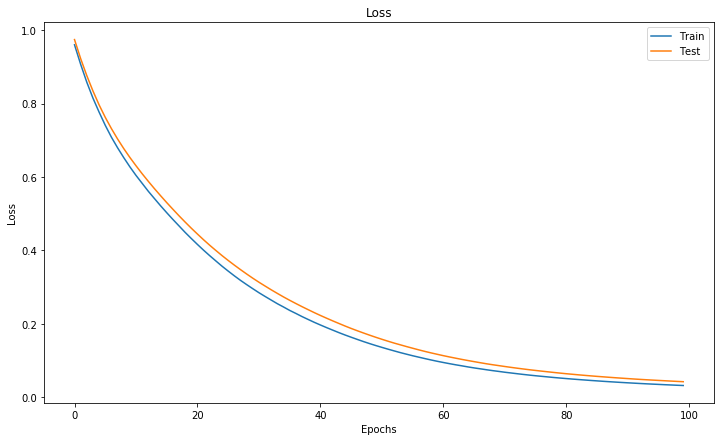

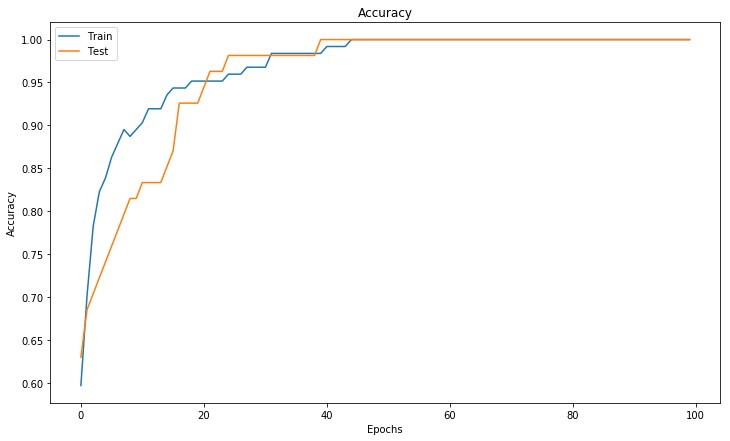

In [599]:
loss_plotter(history_cv)
acc_plotter(history_cv)

In [607]:
print("Maximum accuracy value: {}".format(max(history_cv.history["val_acc"])))
print("Minimum loss value: {}".format(min(history_cv.history["val_loss"])))

Maximum accuracy value: 1.0
Minimum loss value: 0.041710520163178444


In [601]:
y_pred_class = model.predict(x_test)

In [602]:
y_p = []

for pred in y_pred_class:
    y_p.append(np.argmax(pred))

In [603]:
y_test_inv = lb.inverse_transform(y_test)-1

In [604]:
y_test_inv

array([0, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 1, 2, 1, 2, 1, 0, 2])

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    
    This function prints and plots the confusion matrix
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

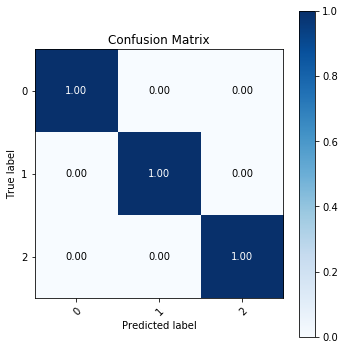

In [605]:
plot_confusion_matrix(y_test_inv,y_p, [0,1,2], normalize = True, title = "Confusion Matrix")

La confusion matrix ci dice che tutte le predizioni fatte dalla rete neurale corrisponde con la classificazione eseguita dall'enologo. Possiamo quindi essere soddisfatti da questo algoritmo